In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import classification_report, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RandomizedSearchCV, GridSearchCV, KFold, train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint
from sklearn import model_selection
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import rcParams
from sklearn.preprocessing import QuantileTransformer
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings(action='ignore')


C:\Users\ido20\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ido20\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
file_path = r"C:\Users\ido20\טבע ובריאות אתר Dropbox\Ido Tsarfaty\My PC (DESKTOP-715MDBO)\Downloads\diabetes.csv"
data = pd.read_csv(file_path)


* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [5]:
data.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

In [6]:
missing_values = data.isnull().sum()

duplicates = data.duplicated().sum()

missing_values, duplicates


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 0)

In [7]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame and it has an 'Outcome' column
colors = ['gold', 'mediumturquoise']
labels = ['0', '1']

values = data['Outcome'].value_counts() / data['Outcome'].shape[0]

fig = go.Figure(
    data=[go.Pie(
        labels=labels,
        values=values, 
        hole=.3, 
        hoverinfo='label+percent', 
        textinfo='percent', 
        textfont_size=20, 
        marker=dict(colors=colors, line=dict(color='#000000', width=2))
    )],
    layout=go.Layout(
        title={
            'text': "Diabetic/Non-Diabetic Distribution",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 24}
        }
    )
)

fig.show()


#### As we can see, there is no Nan in our data and therefore there is no need to consider the issue of lack of data in certain columns and so far it can be seen that the data is reliable in terms of lack of data, and the data is wel balanced  

In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, stratify=data["Outcome"])

test_target = data_test["Outcome"]
train_target = data_train["Outcome"]

print(f"Test stratification is: {test_target.mean()}")
print(f"Train stratification is: {train_target.mean()}")

Test stratification is: 0.35064935064935066
Train stratification is: 0.3485342019543974


### To ensure that we have an equal distribution of people with and without diabetes, we will set the stratification parameter to data["diabetic/non-diabetic"] so that we have an equal number of data points in our test and model data.

We double check that the stratification is correct by checking the mean of the target column in each data set.


##### train_test_split():
Splits dataset into training and testing sets, preserving target variable distribution.

##### test_target.mean():
Prints mean target variable value in testing set.

##### train_target.mean():
Prints mean target variable value in training set.

In [8]:
data_train.to_csv(r"C:\FINAL_PROF_MACHINE_LEARNING\train")
data_test.to_csv(r"C:\FINAL_PROF_MACHINE_LEARNING\final_dataset_test")

#### Now before we continue to work on processing the data we will keep its fragmentation clean so that we can work on it later and trust that it is reliable and not "dirty"

In [9]:
print(data.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

data.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

#### Among the various attributes, several have a minimum value of 0. Let's examine these features in more detail.

### Checking and Removing Outliers


In [11]:
feature_names = [cname for cname in data.loc[:,:'Age'].columns]

<Axes: xlabel='Pregnancies', ylabel='Count'>

<Axes: xlabel='Glucose', ylabel='Count'>

<Axes: xlabel='BloodPressure', ylabel='Count'>

<Axes: xlabel='SkinThickness', ylabel='Count'>

<Axes: xlabel='Insulin', ylabel='Count'>

<Axes: xlabel='BMI', ylabel='Count'>

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

<Axes: xlabel='Age', ylabel='Count'>

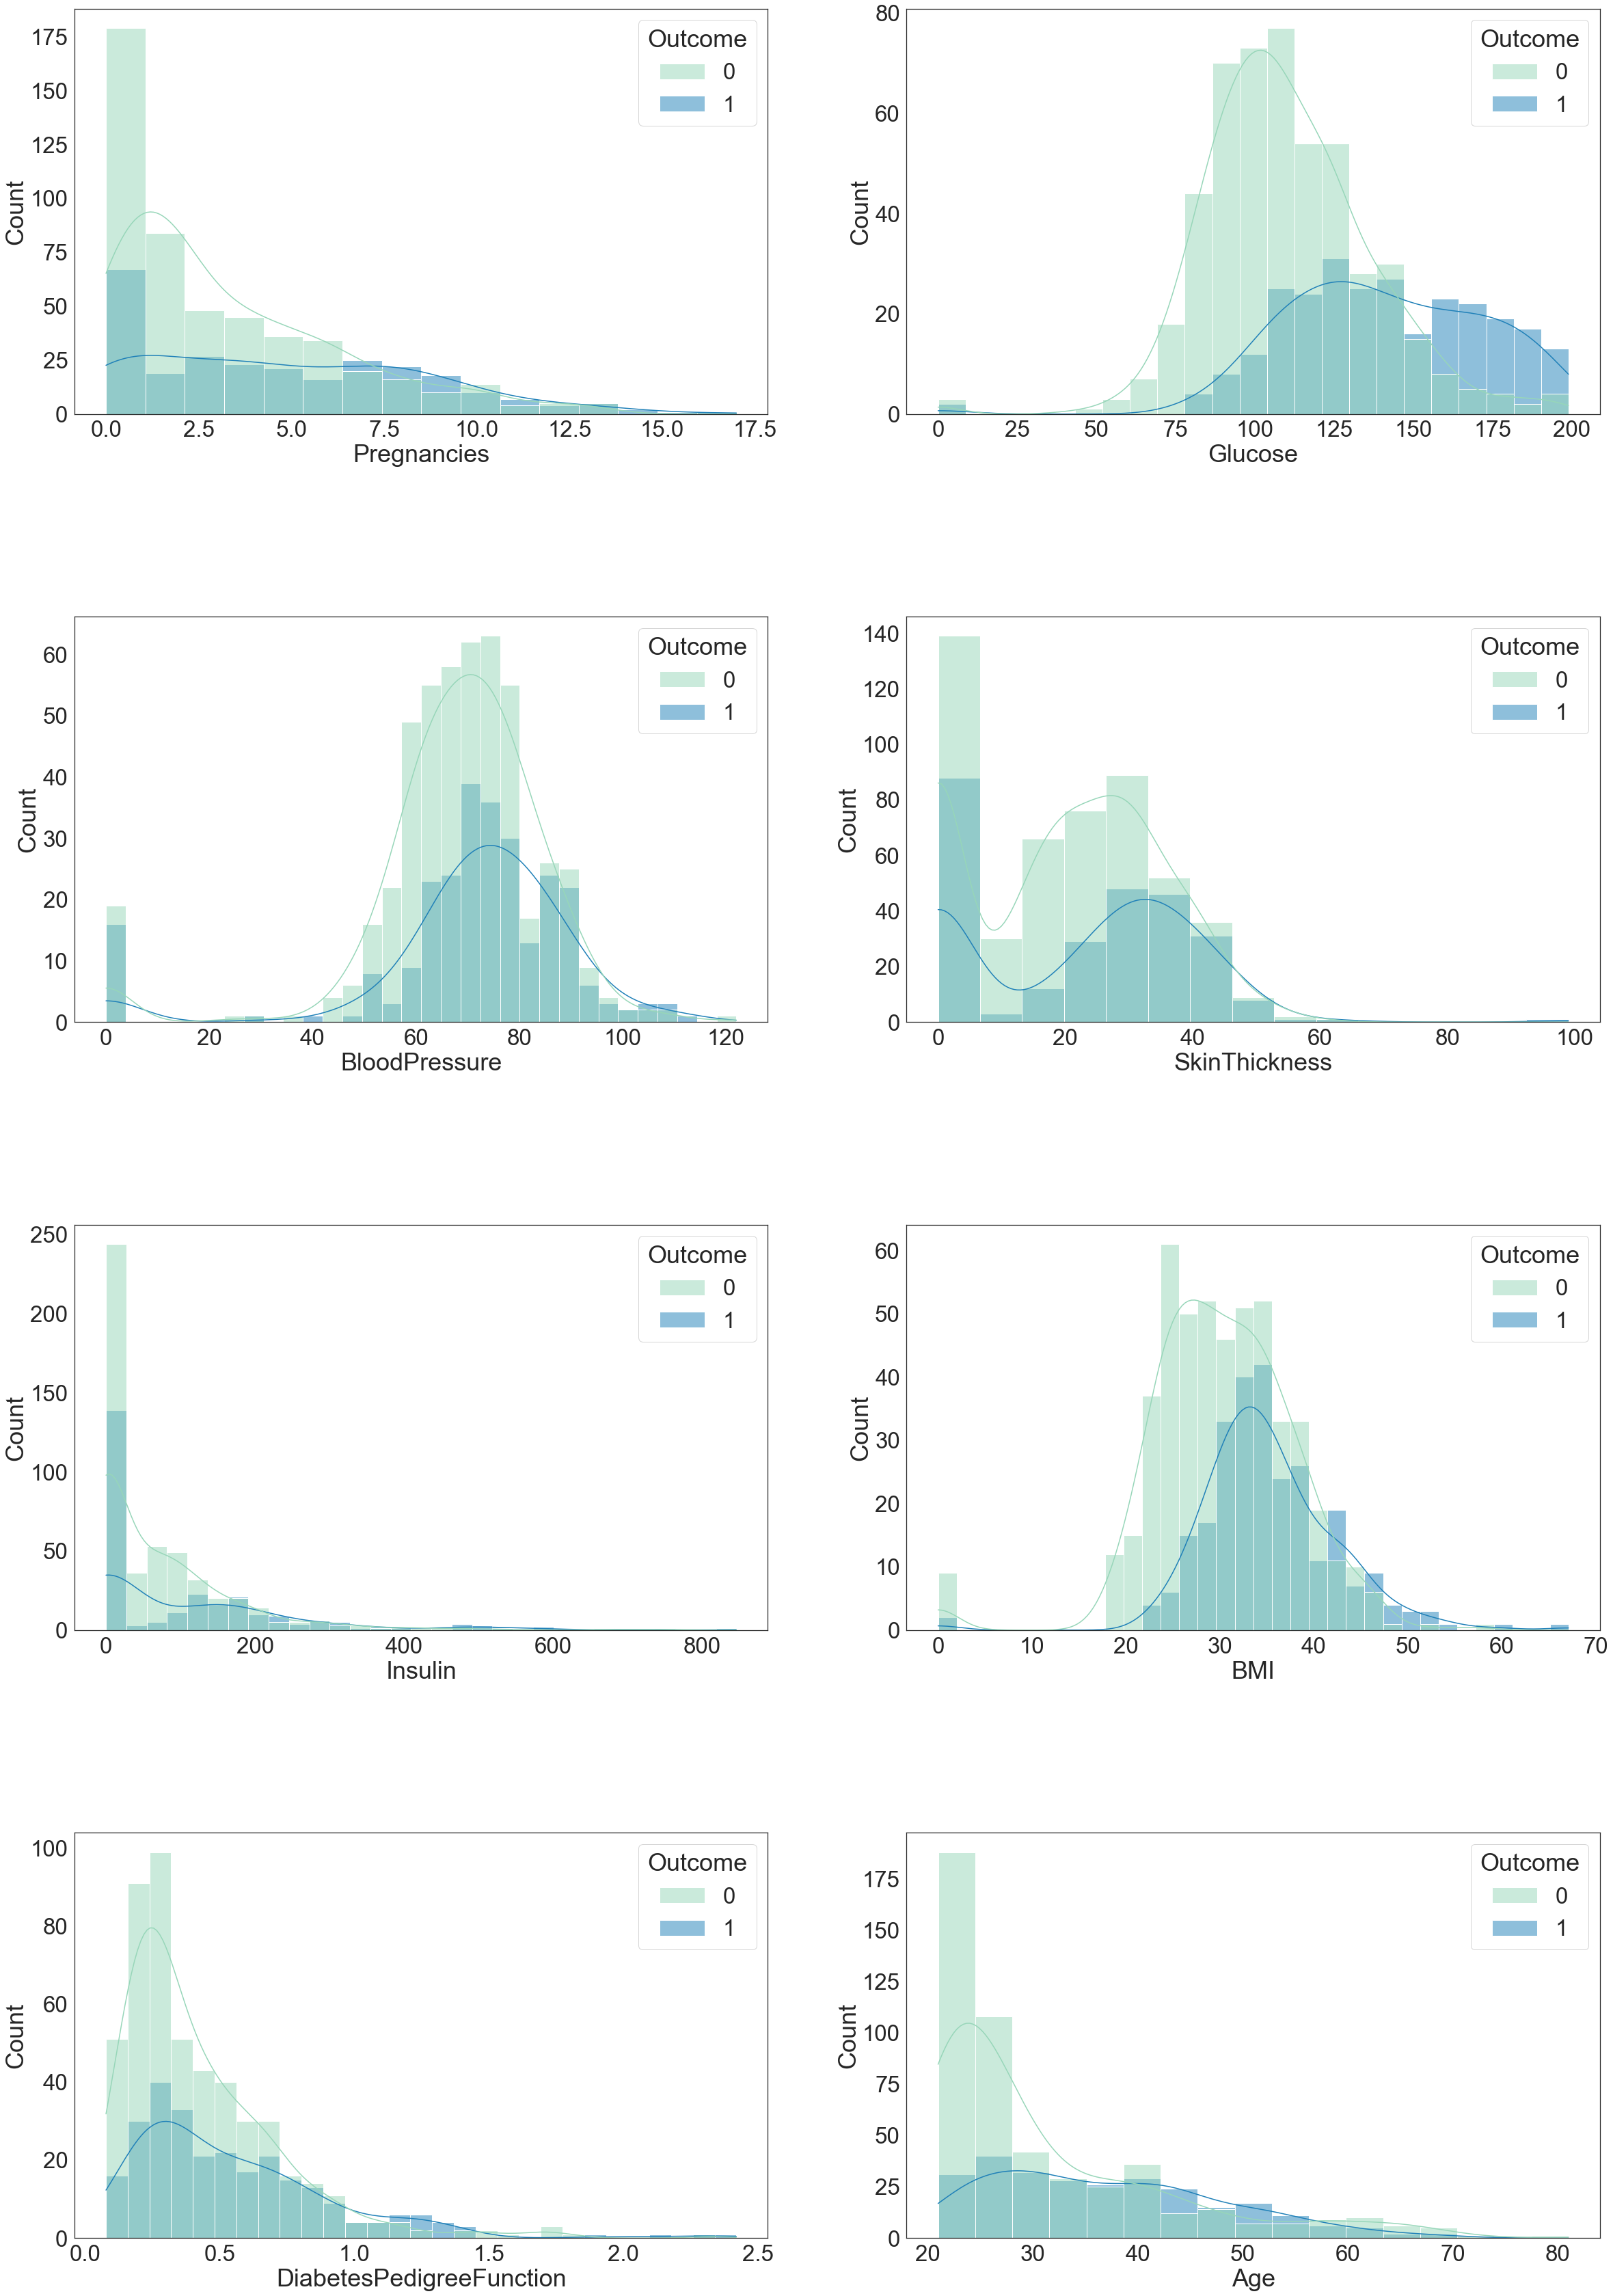

In [12]:

plt.rcParams['figure.figsize'] = (20, 60) 
sns.set(font_scale=3)  
sns.set_style("white")
sns.set_palette("bright")

fig, axes = plt.subplots(4, 2, figsize=(40, 60))
plt.subplots_adjust(hspace=0.5)
for i, name in enumerate(feature_names):
    row = i // 2
    col = i % 2
    sns.histplot(data=data, x=name, hue="Outcome", kde=True, ax=axes[row, col], palette="YlGnBu");

plt.show()


##### Looking at the plots above, it would be beneficial to replace the zero values in each feature with another value. Let's start by calculating the proportion of zero values for each feature.

In [13]:
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = data['Glucose'].count()

for feature in zero_features:
    zero_count = data[data[feature] == 0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100 * zero_count / total_count))


Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


As indicated earlier, the proportion of zero values in the `SkinThickness` and `Insulin` features appears to be significant. Therefore, we will replace these zero values with the mean value of each respective feature.

However, it's important to note that a zero value might hold significance for these features. Ideally, consulting a diabetes expert would help validate this decision. Since we lack such domain knowledge or expert advice, we will proceed by replacing the zero values with the mean values for now.

In [14]:
diabetes_mean = data[zero_features].mean()
data[zero_features]=data[zero_features].replace(0, diabetes_mean)

In [15]:
diabetes_mean

Pregnancies        3.845052
Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [16]:
data[zero_features]

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI
0       6.000000    148.0           72.0      35.000000   79.799479  33.6
1       1.000000     85.0           66.0      29.000000   79.799479  26.6
2       8.000000    183.0           64.0      20.536458   79.799479  23.3
3       1.000000     89.0           66.0      23.000000   94.000000  28.1
4       3.845052    137.0           40.0      35.000000  168.000000  43.1
..           ...      ...            ...            ...         ...   ...
763    10.000000    101.0           76.0      48.000000  180.000000  32.9
764     2.000000    122.0           70.0      27.000000   79.799479  36.8
765     5.000000    121.0           72.0      23.000000  112.000000  26.2
766     1.000000    126.0           60.0      20.536458   79.799479  30.1
767     1.000000     93.0           70.0      31.000000   79.799479  30.4

[768 rows x 6 columns]

#### By excluding the zero values from each feature, we achieve a distribution that approximates a normal distribution. Consequently, we will proceed with linear scaling followed by standard scaling to normalize the data.

In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [18]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

### Scaling

###### Even though we replaced zero values with mean values, some features still exhibit a skewed distribution. To address this, we have decided to use nonlinear scaling. Specifically, we will use the QuantileTransformer, which transforms the data to follow a normal distribution as closely as possible, based on the referenced notebook.

###### The QuantileTransformer ranks or smooths the relationship between observations and maps them onto other distributions, such as the uniform or normal distribution.

In [19]:
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

X_train.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

<Axes: xlabel='Pregnancies', ylabel='Count'>

<Axes: xlabel='Glucose', ylabel='Count'>

<Axes: xlabel='BloodPressure', ylabel='Count'>

<Axes: xlabel='SkinThickness', ylabel='Count'>

<Axes: xlabel='Insulin', ylabel='Count'>

<Axes: xlabel='BMI', ylabel='Count'>

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

<Axes: xlabel='Age', ylabel='Count'>

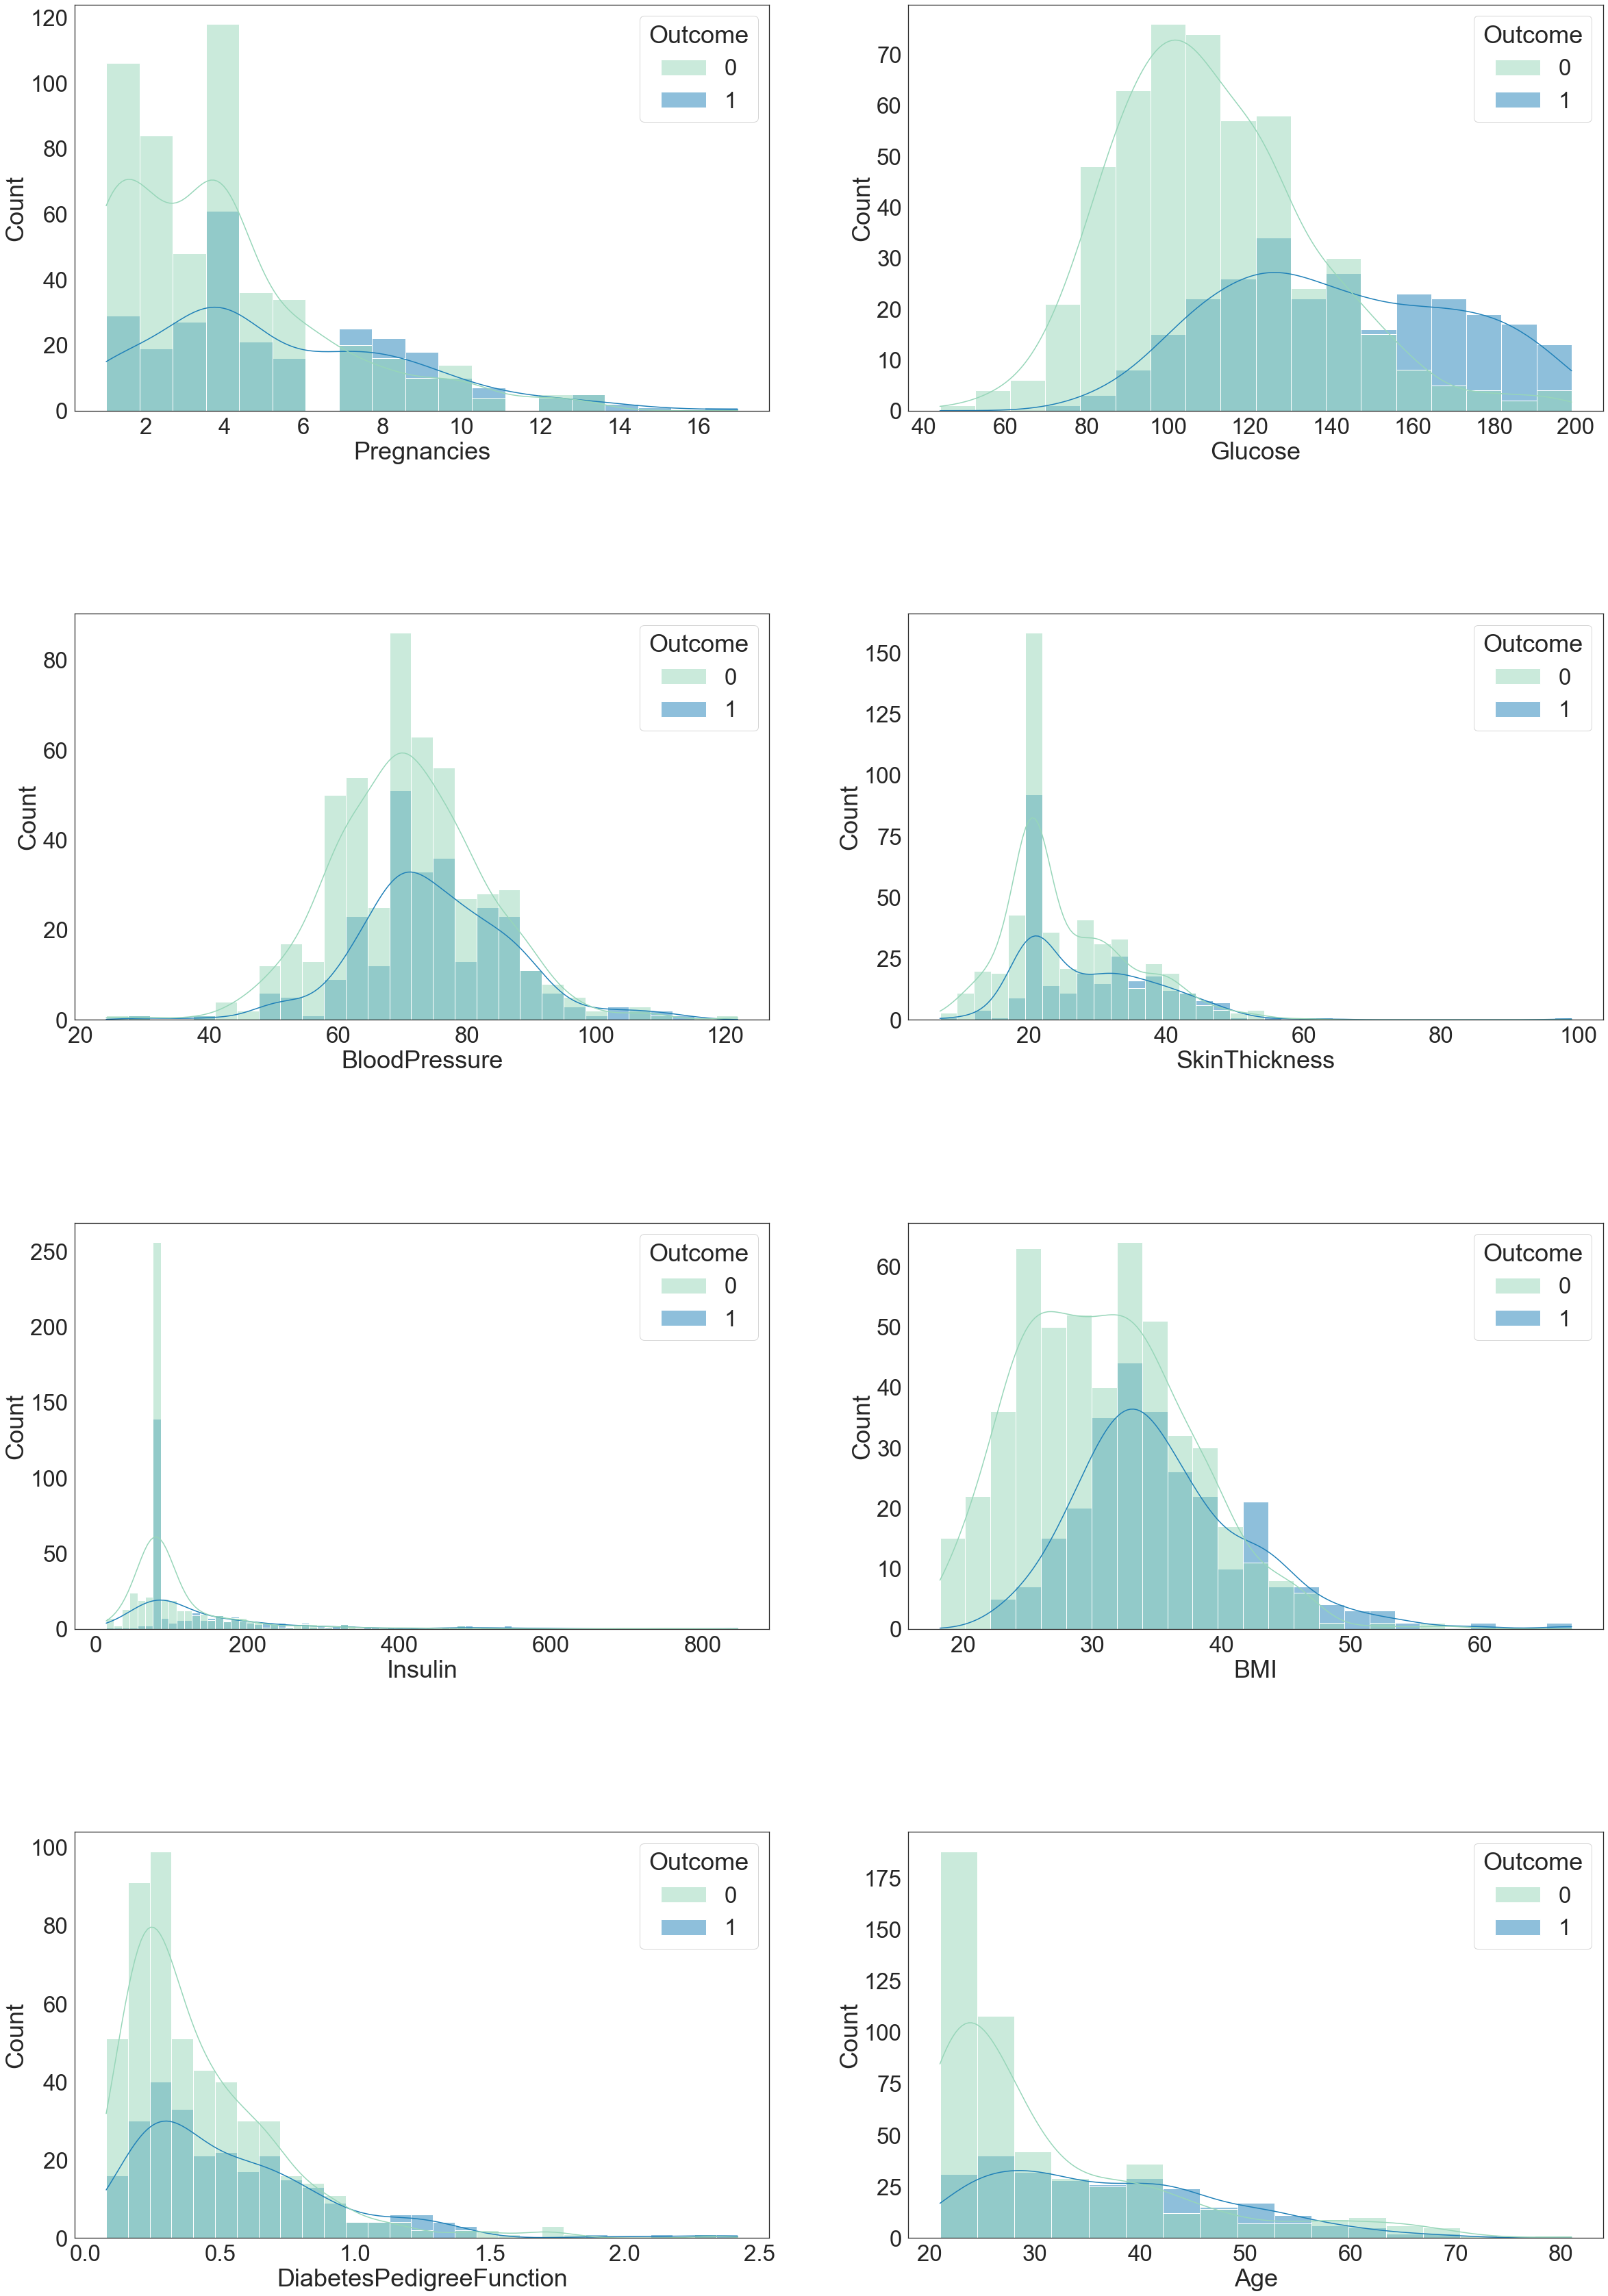

In [22]:

plt.rcParams['figure.figsize'] = (20, 60) 
sns.set(font_scale=3)  
sns.set_style("white")
sns.set_palette("bright")

fig, axes = plt.subplots(4, 2, figsize=(40, 60))
plt.subplots_adjust(hspace=0.5)
for i, name in enumerate(feature_names):
    row = i // 2
    col = i % 2
    sns.histplot(data=data, x=name, hue="Outcome", kde=True, ax=axes[row, col], palette="YlGnBu");

plt.show()


### Correlation between features¶


<Figure size 1008x576 with 0 Axes>

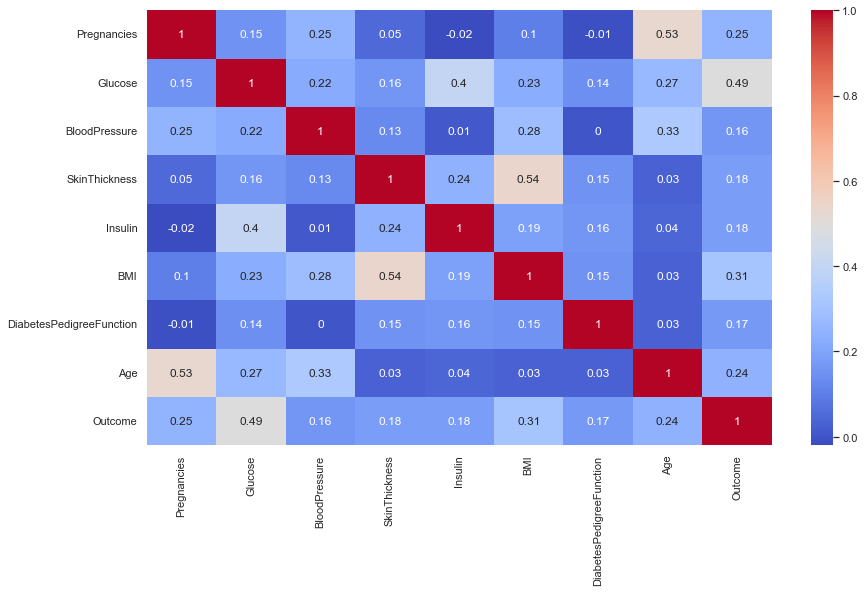

In [23]:

data = data.apply(pd.to_numeric)

plt.figure(figsize=(14, 8))
sns.set_theme(style="white")
corr = data.corr().round(2)
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2g')

### Updated Analysis of the Correlation Matrix:

1. **High Positive Correlation with Target:**
   - **Glucose and Outcome (0.49):** Glucose shows a strong positive correlation with the target variable, indicating that higher glucose levels are associated with being diabetic.
   - **BMI and Outcome (0.31):** BMI also shows a moderate positive correlation with the target variable, suggesting higher BMI levels are associated with being diabetic.

2. **Moderate Positive Correlation with Target:**
   - **Age and Outcome (0.24):** Age shows a moderate positive correlation with the target variable, indicating that older age is associated with being diabetic.
   - **Pregnancies and Outcome (0.25):** Pregnancies also have a moderate positive correlation with the target, suggesting that the number of pregnancies could be a factor associated with being diabetic.

3. **Low Correlation with Target:**
   - **SkinThickness and Outcome (0.18):** Skin Thickness has a low positive correlation with the target.
   - **Insulin and Outcome (0.18):** Insulin shows a low positive correlation with the target.
   - **DiabetesPedigreeFunction and Outcome (0.17):** Diabetes Pedigree Function has a low positive correlation with the target.
   - **BloodPressure and Outcome (0.16):** Blood Pressure shows a low positive correlation with the target.

4. **Moderate to High Correlations Among Features:**
   - **Insulin and Glucose (0.4):** There is a moderate positive correlation between Insulin and Glucose, indicating a relationship between these markers.
   - **BMI and SkinThickness (0.54):** There is a moderate to high positive correlation between BMI and Skin Thickness, suggesting that these features are related.
   - **Age and Pregnancies (0.53):** Age shows a high positive correlation with the number of pregnancies, which is expected as older individuals are likely to have had more pregnancies.
   - **BloodPressure and Age (0.33):** There is a moderate positive correlation between Blood Pressure and Age.

### Conclusion:
The correlation matrix indicates that Glucose and BMI are the most significant predictors of the target variable (Outcome), suggesting these features are crucial for predicting diabetic status in this dataset. Age and the number of pregnancies also show moderate correlations with the target and are important features to consider. Other features like Skin Thickness, Insulin, Diabetes Pedigree Function, and Blood Pressure have lower correlations with the target but may still provide valuable information when used in a multivariate analysis.

This analysis helps in understanding which features to focus on for predictive modeling and feature selection.

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

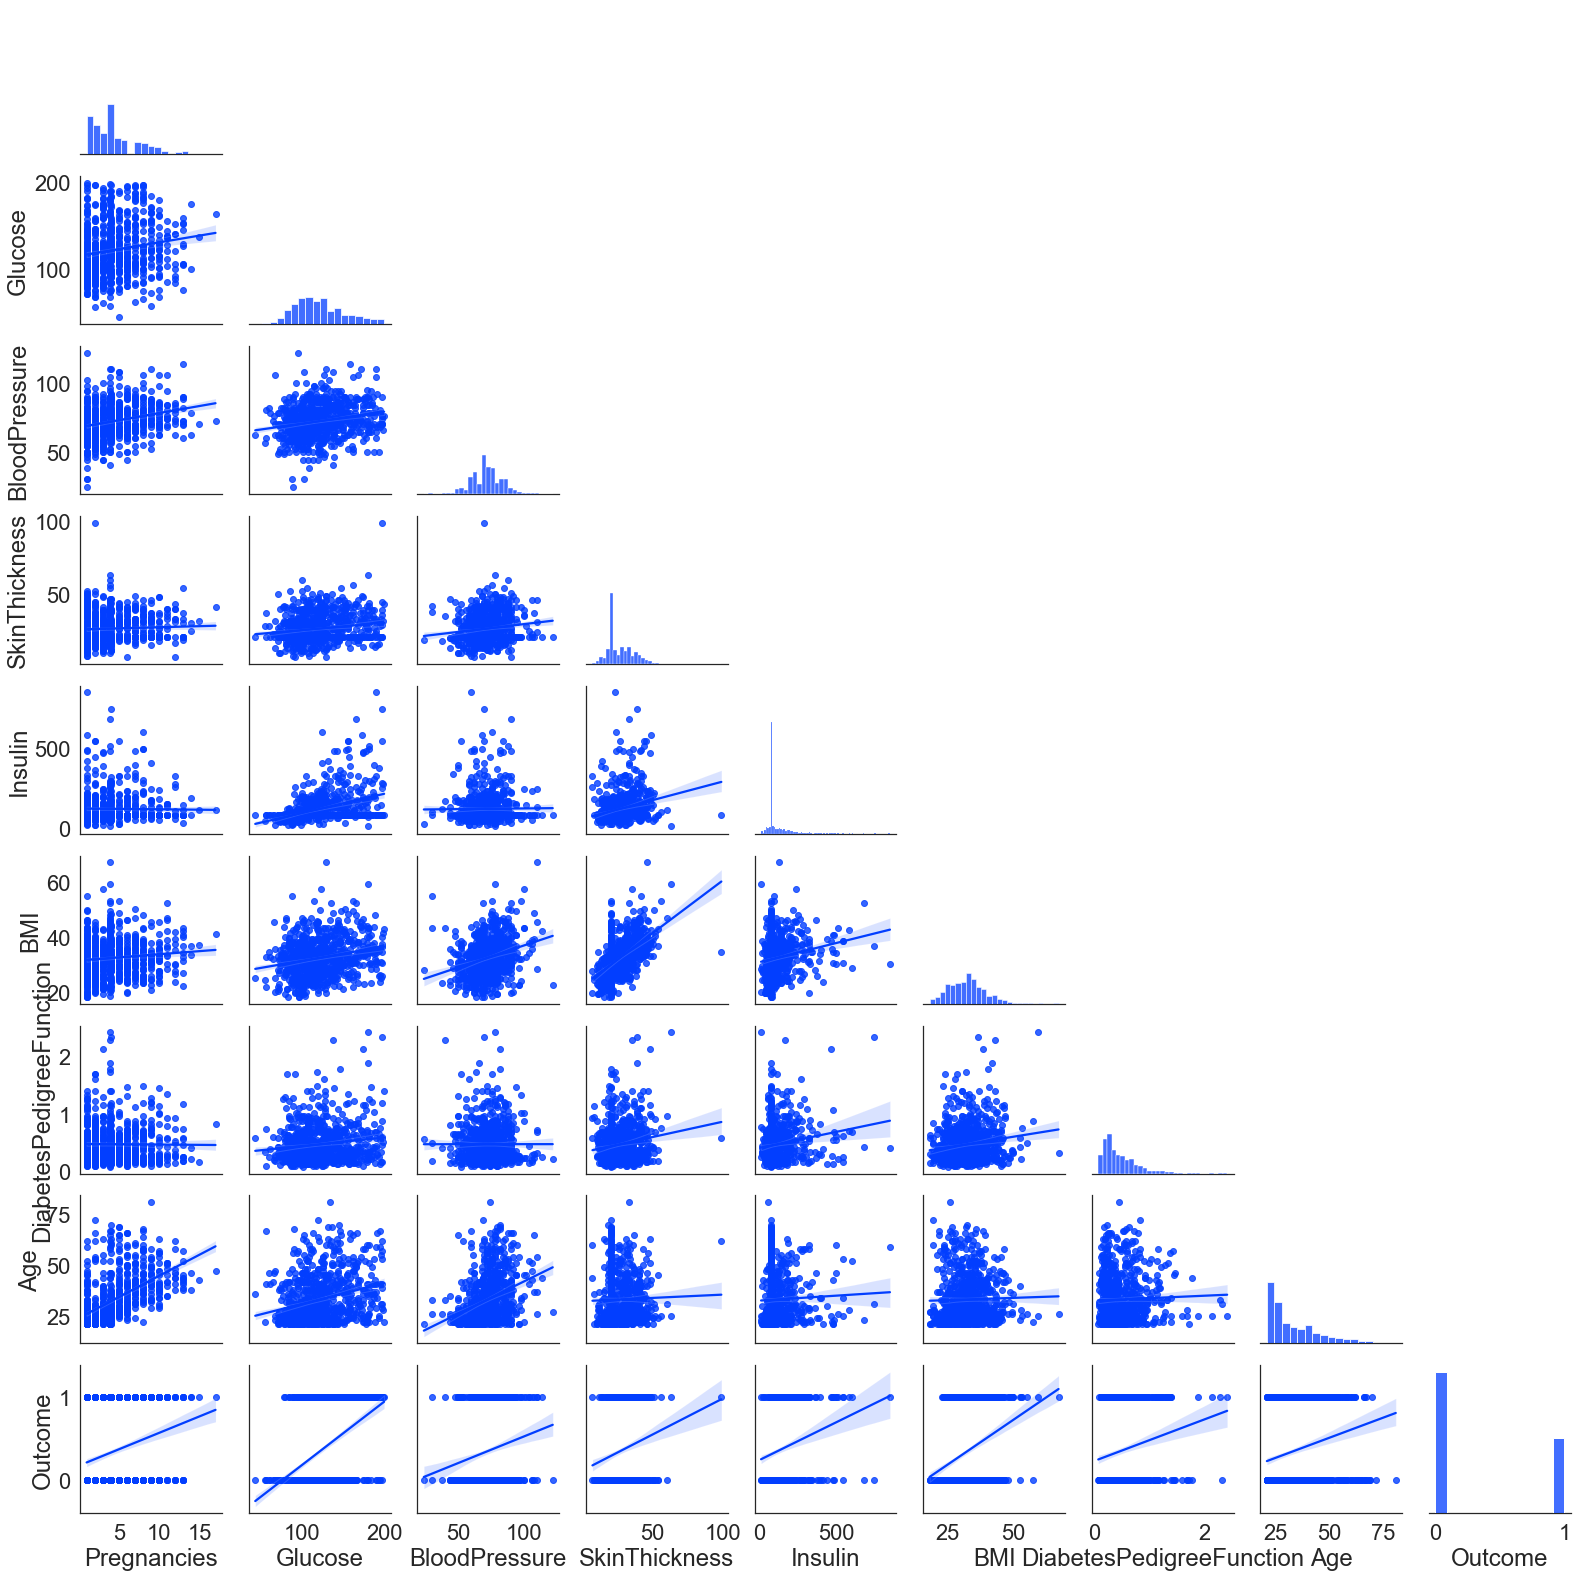

In [24]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(data,kind = 'reg',corner = True,palette ='YlGnBu' )

### <span style="color:red">Observations:</span>
1. **Glucose and Outcome Correlation:**
 - There is a strong correlation between Glucose levels and the Outcome variable, indicating that Glucose is likely the most significant feature for training the model. This suggests that blood glucose levels are a critical predictor for diabetes.

2. **Other Significant Features:**
 - Features such as BMI, Pregnancies, and Age are also expected to play a crucial role in the model's performance. These variables show substantial correlations with the outcome and are thus valuable for predicting diabetes.

3. **Multicollinearity Concerns:**
 - There is a notable correlation between SkinThickness and BMI. This could indicate a multicollinearity issue, where these features are not independent of each other. Multicollinearity can inflate the variance of coefficient estimates and may cause problems in the model's interpretation and performance.

4. **Action Plan:**
 - While multicollinearity is a potential concern, it will only be addressed if it negatively impacts model performance. Initially, all significant features will be included in the model. If performance issues arise, further analysis will be conducted to identify and mitigate multicollinearity.

By considering these observations, we can focus on the most influential features for diabetes prediction and be mindful of potential issues that might require additional attention during model evaluation and refinement.

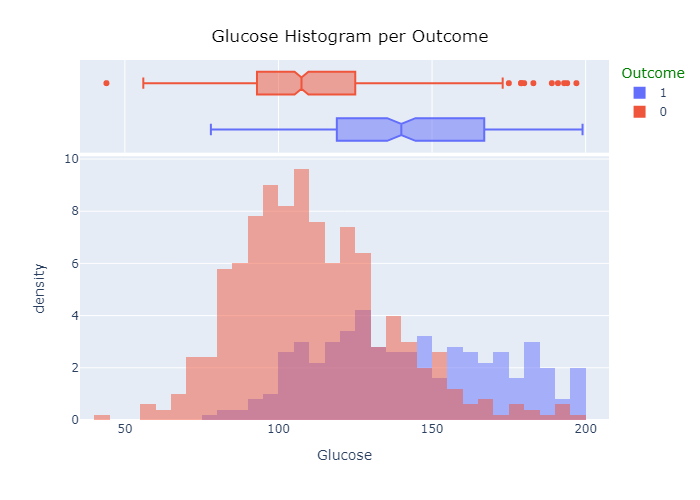

In [25]:
fig = px.histogram(data, x="Glucose", 
                   color="Outcome", 
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )  
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Glucose Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show(renderer="png")

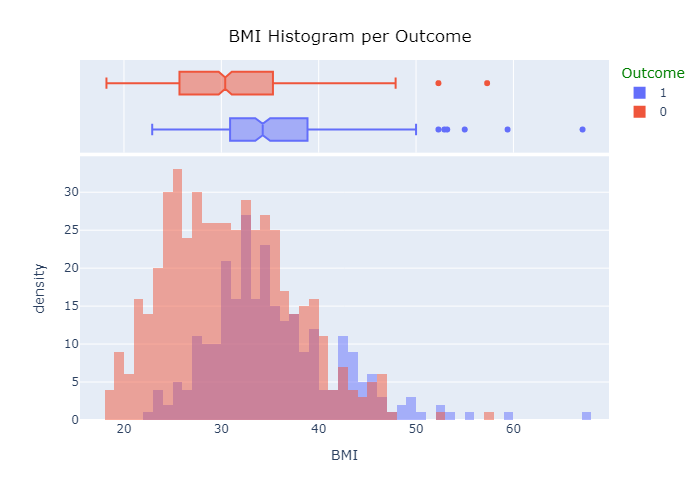

In [26]:
fig = px.histogram(data, x="BMI", 
                   color="Outcome", 
                   marginal="box",
                   barmode="overlay",
                   histnorm='density') 

fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "BMI Histogram per Outcome",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

fig.show(renderer="png")

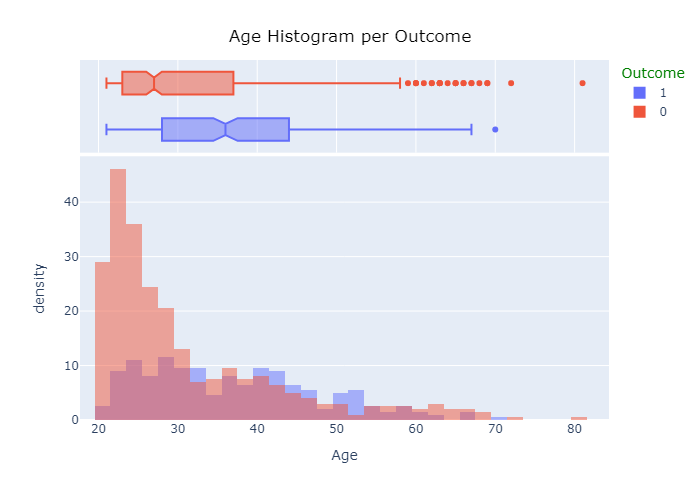

In [27]:
fig = px.histogram(data, x="Age", 
                   color="Outcome", 
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )  
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Age Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show(renderer="png")

From the visualizations above, it's clear how each feature spreads across the different outcomes. Particularly, the glucose feature stands out due to its high correlation, as the distribution for outcomes 1 and 0 shows a more pronounced divergence compared to other features. This marked difference in the glucose distributions suggests it will play a pivotal role in enhancing the classification performance.

In [28]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [29]:
numerical_features = data.dtypes[data.dtypes!='object'].index

skewed_features = data[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

Skew
Insulin                   3.291825
DiabetesPedigreeFunction  1.919911
SkinThickness             1.226670
Age                       1.129597
Pregnancies               1.041865
Outcome                   0.635017
BMI                       0.601103
Glucose                   0.533225
BloodPressure             0.173050

We're identifying numerical features In the data dataset and calculating their skewness. Then, we sort the features based on their skewness values in descending order to prioritize the most skewed features for transformation. Finally, we create a DataFrame displaying the skewness values for each numerical feature.

<Axes: xlabel='Insulin', ylabel='Count'>

Text(0.5, 1.0, 'Insulin')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age')

<Axes: xlabel='Pregnancies', ylabel='Count'>

Text(0.5, 1.0, 'Pregnancies')

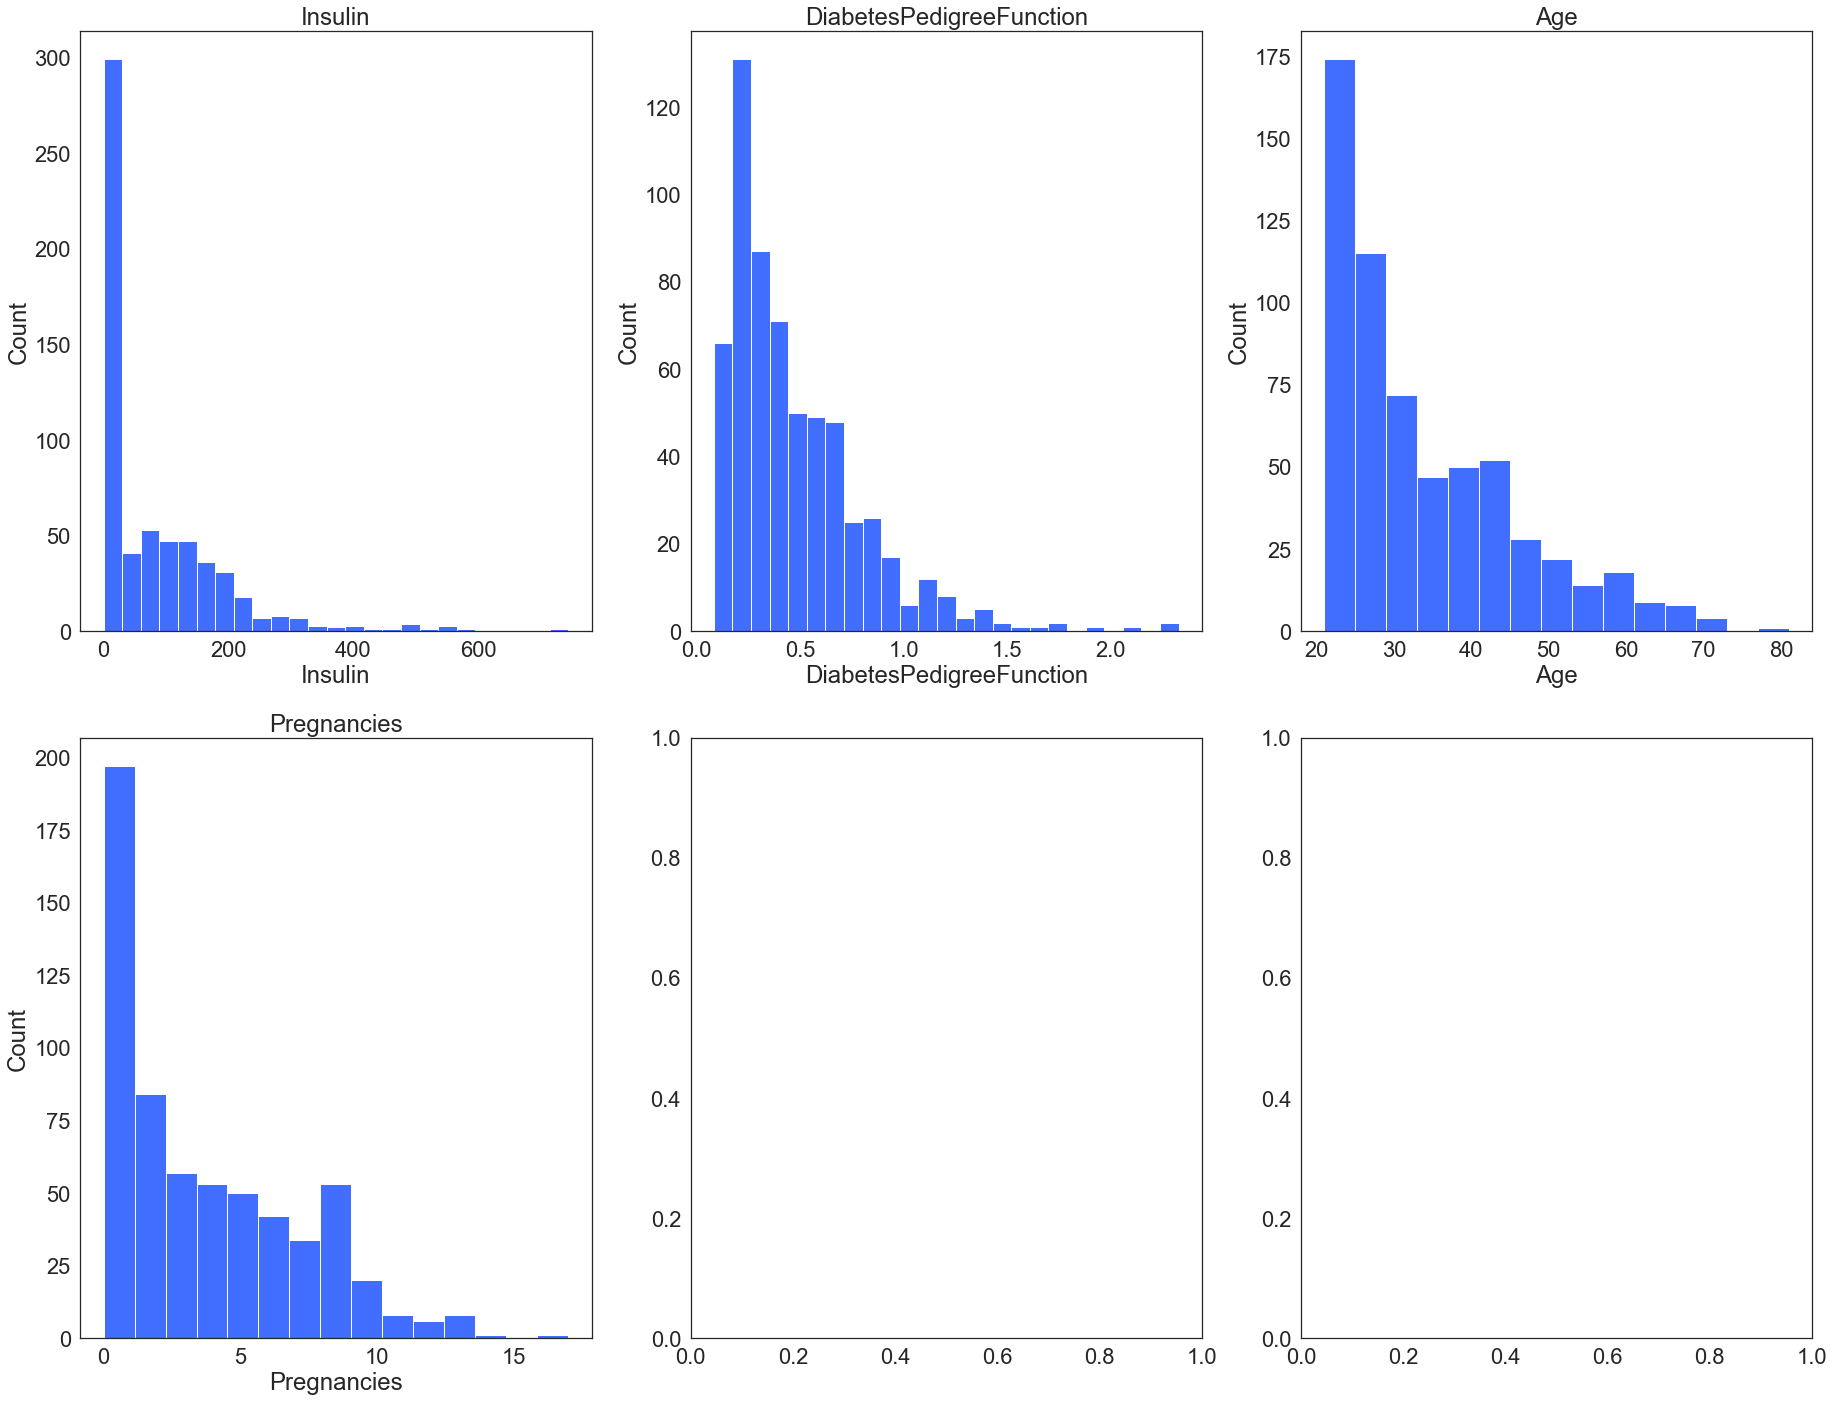

In [30]:
# Apply log transformation for highly positively skewed feature
data['SkinThickness'] = data['SkinThickness'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Apply square root transformation for moderately positively skewed features
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].apply(lambda x: np.sqrt(x))
data['Outcome'] = data['Outcome'].apply(lambda x: np.sqrt(x))
data['BMI'] = data['BMI'].apply(lambda x: np.sqrt(x))
data['Glucose'] = data['Glucose'].apply(lambda x: np.sqrt(x))
data['Age'] = data['Age'].apply(lambda x: np.sqrt(x))
data['Insulin'] = data['Insulin'].apply(lambda x: np.sqrt(x))
data['BloodPressure'] = data['BloodPressure'].apply(lambda x: np.sqrt(x))

# Apply reflection and log transformation for negatively skewed feature
data['Pregnancies'] = data['Pregnancies'].apply(lambda x: np.log1p(-x) if x < 0 else x)

fig, axes = plt.subplots(2, 3, figsize=(26, 20))

transformed_features = ['Insulin', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']

for index, columnName in enumerate(transformed_features):
    ax = axes.reshape(-1)[index]
    sns.histplot(data_train[columnName], ax=ax)
    ax.set_title(columnName)

plt.tight_layout()
plt.show()


In [31]:
numerical_features = data.dtypes[data.dtypes!='object'].index

skewed_features = data[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

Skew
Insulin                   2.061024
Pregnancies               1.041865
DiabetesPedigreeFunction  0.901802
Age                       0.850598
Outcome                   0.635017
BMI                       0.257721
Glucose                   0.251355
SkinThickness             0.013768
BloodPressure            -0.254319

### Why Transform the Data?

Data transformation is a crucial step in machine learning for several reasons:

1. **Reducing Skewness**:
   
   - **Log Transformation**:
     Applied to features with high positive skewness (e.g., **SkinThickness**) to reduce skewness and make the data distribution more symmetric.

   - **Square Root Transformation**:
     Applied to moderately positively skewed features (e.g., **DiabetesPedigreeFunction**, **Outcome**, **BMI**, **Glucose**, **Age**, **Insulin**, **BloodPressure**) to improve the symmetry of the data distribution.

   - **Reflection and Log Transformation**:
     Applied to negatively skewed features (e.g., **Pregnancies**) to reduce skewness and make the data distribution more symmetric.

2. **Improving Model Performance**:
   Symmetric distributions help many machine learning algorithms perform better, as they often assume normal distribution of the data.

3. **Enhancing Feature Relationships**:
   Transformations can enhance the linearity between features and the target variable, improving the model's ability to learn and make accurate predictions.

By performing these transformations, we ensure that our data is more suitable for machine learning models, leading to better performance and more reliable predictions.


## --------------------------------------------------------------------------------------------------------------------------


#### Predictive Models: Data Processing Functions
Prior to constructing our models, it's essential to establish functions for data processing. These functions will align with the insights gained from our exploratory data analysis. Ensuring consistency in data treatment across training and test datasets is crucial to prevent data leakage. By defining these functions upfront, we maintain methodological coherence and mitigate potential inconsistencies in our analyses.

In [32]:
def diabetes_mean(training_dataset):
    zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    diabetes_mean = data[zero_features].mean()
    data[zero_features]=data[zero_features].replace(0, diabetes_mean)
    return data

def apply_transformations(data):
    if data is None:
        print("Data is None at the start of transformations.")
        return None
    print("Applying transformations...")
       # Apply log transformation for highly positively skewed feature
    data['SkinThickness'] = data['SkinThickness'].apply(lambda x: np.log1p(x) if x > 0 else 0)
    # Apply square root transformation for moderately positively skewed features
    data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].apply(lambda x: np.sqrt(x))
    data['Outcome'] = data['Outcome'].apply(lambda x: np.sqrt(x))
    data['BMI'] = data['BMI'].apply(lambda x: np.sqrt(x))
    data['Glucose'] = data['Glucose'].apply(lambda x: np.sqrt(x))
    data['Age'] = data['Age'].apply(lambda x: np.sqrt(x))
    data['Insulin'] = data['Insulin'].apply(lambda x: np.sqrt(x))
    data['BloodPressure'] = data['BloodPressure'].apply(lambda x: np.sqrt(x))

    # Apply reflection and log transformation for negatively skewed feature
    data['Pregnancies'] = data['Pregnancies'].apply(lambda x: np.log1p(-x) if x < 0 else x)
    print("Transformations applied successfully.")
    return data



In [33]:
td = pd.read_csv(r"C:\FINAL_PROF_MACHINE_LEARNING\train", header=0, index_col=0)


In [34]:
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = td['Glucose'].count()

for feature in zero_features:
    zero_count = td[td[feature] == 0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100 * zero_count / total_count))


Pregnancies 0 number of cases 85, percent is 13.84 %
Glucose 0 number of cases 4, percent is 0.65 %
BloodPressure 0 number of cases 23, percent is 3.75 %
SkinThickness 0 number of cases 175, percent is 28.50 %
Insulin 0 number of cases 290, percent is 47.23 %
BMI 0 number of cases 9, percent is 1.47 %


In [35]:
td = diabetes_mean(td)
td = apply_transformations(td)


Applying transformations...
Transformations applied successfully.


In [36]:
numerical_features = td.dtypes[td.dtypes!='object'].index

skewed_features = td[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

Skew
Insulin                   1.483090
Pregnancies               1.041865
Age                       0.722577
Outcome                   0.635017
DiabetesPedigreeFunction  0.490053
BMI                       0.098754
Glucose                   0.097714
SkinThickness            -0.278302
BloodPressure            -0.502752

In [37]:
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = td['Glucose'].count()

for feature in zero_features:
    zero_count = td[td[feature] == 0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100 * zero_count / total_count))


Pregnancies 0 number of cases 0, percent is 0.00 %
Glucose 0 number of cases 0, percent is 0.00 %
BloodPressure 0 number of cases 0, percent is 0.00 %
SkinThickness 0 number of cases 0, percent is 0.00 %
Insulin 0 number of cases 0, percent is 0.00 %
BMI 0 number of cases 0, percent is 0.00 %


We see that the functions made after processing the data does perform the job properly

In [38]:

columns_to_keep = [col for col in td.columns if col not in ['Outcome']]

X = td[columns_to_keep]
y = td['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


##### DiabetesPedigreeFunction
This column doesn't really help us
We saw that its effect is close to zero in the correlation matrix and it does not have a high correlation with the other characteristics, so to simplify the model we will abandon it.

### Model Selection and Construction
##### Feature Scaling

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [40]:
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X = scaler.fit_transform(X)
y = y.values.ravel()

In [41]:
X_train_scaled_df = pd.DataFrame(X_train, columns=columns_to_keep)
print(X_train_scaled_df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -5.199338 -1.120205      -0.870846      -2.049594 -1.856596 -0.764710   
1     0.472789  0.321971       0.530220       0.216904 -2.380083 -0.403108   
2    -0.666564 -0.444660      -1.247754       1.247754  0.403108  0.458679   
3    -5.199338  0.834427      -1.366707      -0.501298 -0.295415 -0.375793   
4    -0.050661 -0.889495      -0.698526       1.144237  0.486994  1.685833   

   DiabetesPedigreeFunction       Age  
0                  0.532806 -0.682458  
1                  0.181055  0.635270  
2                 -0.825439 -0.472789  
3                  0.495600 -0.025322  
4                 -0.056708 -1.120205  


In [42]:
print("y_train type:", type(y_train))
print("y_test type:", type(y_test))
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train type: <class 'numpy.ndarray'>
y_test type: <class 'numpy.ndarray'>
y_train shape: (614,)
y_test shape: (154,)


In [43]:
results_df = pd.DataFrame(index=['Decision Tree (Default)'],
                          columns=['F-score', 'Precision','Recall', 'Accuracy'])

For all model building, we will start by building a model using default parameters, then expand it with cross fold validation, and then apply hyper tuning. All the results will be saved to the results_df dataframe for comparison. The same approach will be followed for each model. Models that require more computation time for hyper tuning (like random forest) will start by using a random search to approximate the current parameters.

Any of the models using cross fold validation will use the full training data set (X, y), while models without cross fold will use the test/train split datasets (X_train, X_test, y_train, y_test)

###### We will not use all the models that will be used in the article, but we will use the larger and more familiar models and the ones that have been studied.

## Decision Tree Model Building
#### DT - Test Train Split Validation

In [44]:
dt = DecisionTreeClassifier()

dt_fit = dt.fit(X_train,y_train)


dt_predict = dt_fit.predict(X_test)

results_df.loc['Decision Tree (Default)',:] = [f1_score(y_test,dt_predict, average='macro'), precision_score(y_test,dt_predict), recall_score(y_test,dt_predict),accuracy_score(y_test,dt_predict)]
results_df.sort_values(by='F-score', ascending=False)

F-score Precision Recall  Accuracy
Decision Tree (Default)  0.6538  0.574468    0.5  0.694805

<Figure size 1440x720 with 0 Axes>

[Text(0.6086643739472206, 0.9666666666666667, 'x[1] <= 0.998\ngini = 0.454\nsamples = 614\nvalue = [400, 214]\nclass = Healthy'),
 Text(0.2712310499719259, 0.9, 'x[5] <= -0.744\ngini = 0.379\nsamples = 515\nvalue = [384, 131]\nclass = Healthy'),
 Text(0.08983717012914093, 0.8333333333333334, 'x[1] <= 0.934\ngini = 0.075\nsamples = 128\nvalue = [123, 5]\nclass = Healthy'),
 Text(0.08085345311622684, 0.7666666666666667, 'x[1] <= 0.519\ngini = 0.061\nsamples = 127\nvalue = [123, 4]\nclass = Healthy'),
 Text(0.044918585064570464, 0.7, 'x[5] <= -0.79\ngini = 0.035\nsamples = 112\nvalue = [110, 2]\nclass = Healthy'),
 Text(0.02695115103874228, 0.6333333333333333, 'x[4] <= -1.655\ngini = 0.019\nsamples = 105\nvalue = [104, 1]\nclass = Healthy'),
 Text(0.017967434025828188, 0.5666666666666667, 'x[6] <= 0.665\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = Healthy'),
 Text(0.008983717012914094, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Healthy'),
 Text(0.02695115103874228, 

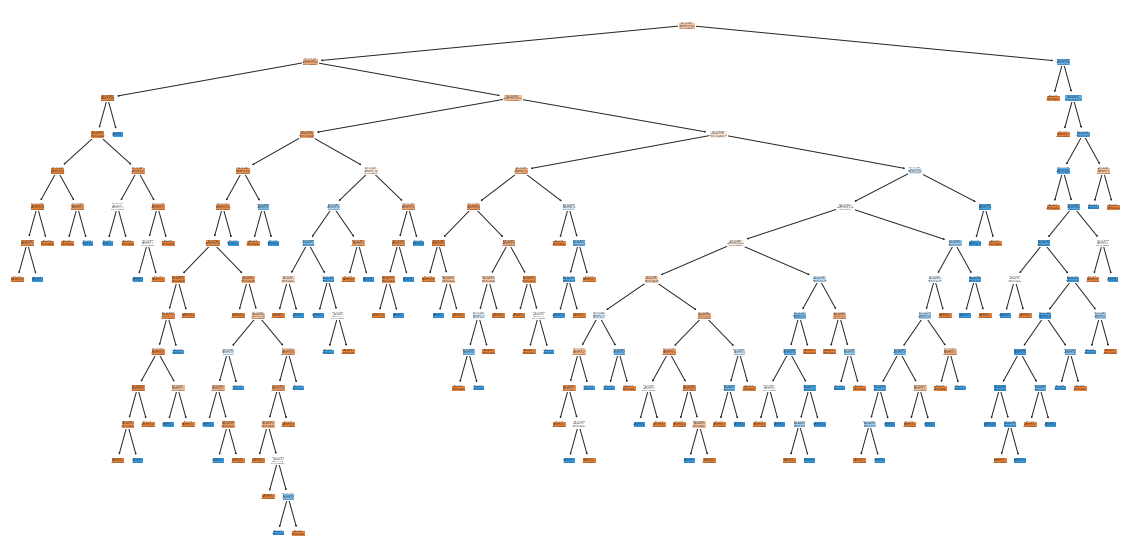

In [45]:
plt.figure(figsize=(20,10))
plot_tree(dt_fit, filled=True, class_names=["Healthy", "Sick"])
plt.show()

<Figure size 360x360 with 0 Axes>

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree (Default)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

<Figure size 360x360 with 0 Axes>

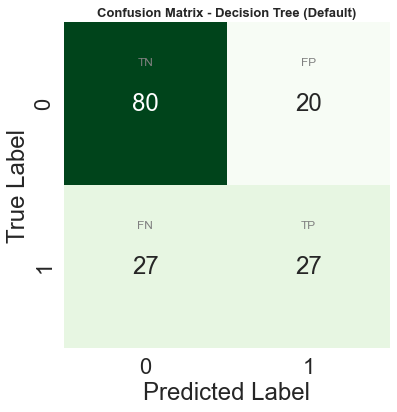

In [46]:
plt.figure(figsize=(5, 5))  

# Create confusion matrix
cm = confusion_matrix(y_test, dt_predict)
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Decision Tree (Default)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Hyperparameter Tuning and Cross-Validation for Decision Trees using RandomizedSearchCV:

In RandomizedSearchCV, a subset of hyperparameter values is randomly sampled from specified probability distributions, rather than exhaustively searching through all possible combinations. For tuning a Decision Tree classifier, the following hyperparameters are selected:

- **max_depth**: Ranging from 3 to None, representing the maximum depth of the tree. Higher values may lead to overfitting, while lower values may result in underfitting.

- **min_samples_leaf**: Randomly sampled from 1 to 20, indicating the minimum number of samples required to be at a leaf node. This helps control the complexity of the tree.

- **criterion**: Both "gini" and "entropy" are considered as criteria for measuring the quality of a split. This allows the model to choose the best criterion for the decision tree.

RandomizedSearchCV efficiently explores the hyperparameter space and selects the optimal combination to improve the performance of the decision tree model.

In [47]:

param = {
    "max_depth": [3,4, None],
    "min_samples_leaf": randint(1, 20),
    "criterion": ["gini", "entropy"]
}


clf = DecisionTreeClassifier()


clf_cv = RandomizedSearchCV(clf, param, cv=10)

clf_cv_fit = clf_cv.fit(X_train, y_train)


cross_val_results = pd.DataFrame(cross_validate(clf_cv_fit.best_estimator_, X, y, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy']))


results_df.loc['Decision Tree (Hyper Parameter Tuning)', :] = cross_val_results[['test_f1_macro', 'test_precision_macro', 'test_recall_macro', 'test_accuracy']].mean().values

results_df.sort_values(by='F-score', ascending=False)


F-score Precision    Recall  Accuracy
Decision Tree (Hyper Parameter Tuning)  0.698922  0.720642  0.695365  0.740858
Decision Tree (Default)                   0.6538  0.574468       0.5  0.694805

In [48]:
clf_cv_fit.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=19)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree (Hyper Parameter Tuning)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

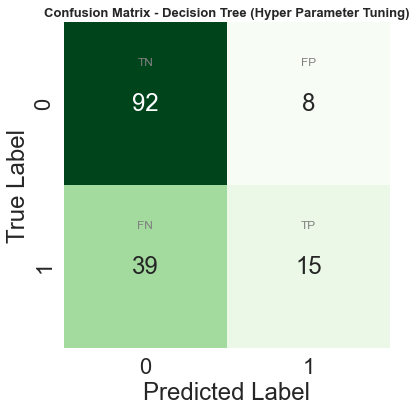

In [49]:
clf_predict = clf_cv_fit.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, clf_predict)
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Decision Tree (Hyper Parameter Tuning)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 1440x720 with 0 Axes>

[Text(0.5769230769230769, 0.875, 'x[1] <= 0.998\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]\nclass = Healthy'),
 Text(0.3076923076923077, 0.625, 'x[5] <= -0.808\nentropy = 0.818\nsamples = 515\nvalue = [384, 131]\nclass = Healthy'),
 Text(0.15384615384615385, 0.375, 'x[1] <= -0.389\nentropy = 0.174\nsamples = 115\nvalue = [112, 3]\nclass = Healthy'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 61\nvalue = [61, 0]\nclass = Healthy'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.31\nsamples = 54\nvalue = [51, 3]\nclass = Healthy'),
 Text(0.46153846153846156, 0.375, 'x[1] <= -0.675\nentropy = 0.904\nsamples = 400\nvalue = [272, 128]\nclass = Healthy'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.506\nsamples = 107\nvalue = [95, 12]\nclass = Healthy'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.969\nsamples = 293\nvalue = [177, 116]\nclass = Healthy'),
 Text(0.8461538461538461, 0.625, 'x[0] <= 0.795\nentropy = 0.638\nsamples = 99\nvalue = [16, 83]\nclass = S

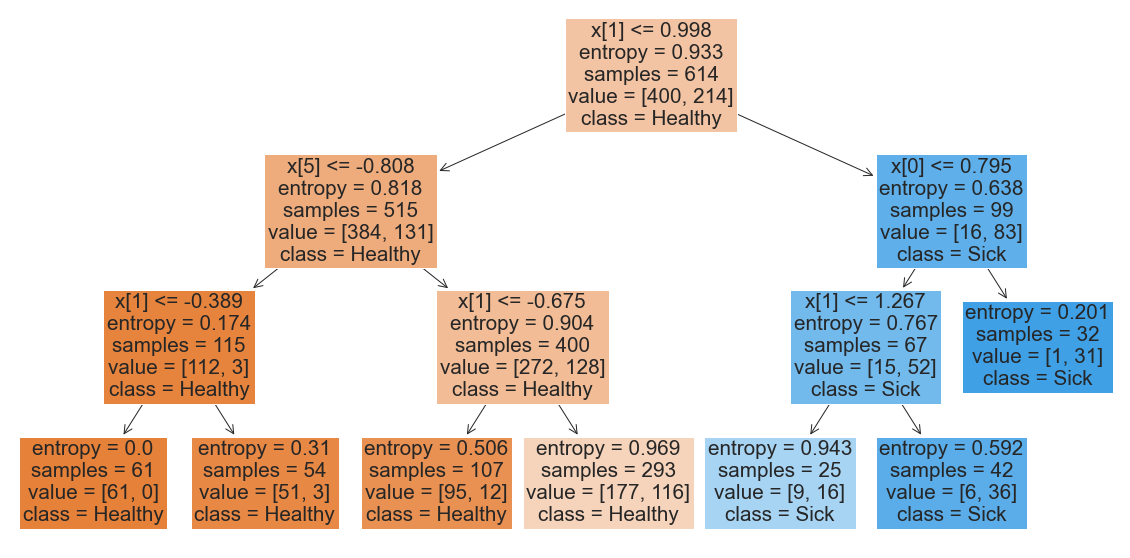

In [50]:

plt.figure(figsize=(20, 10))
plot_tree(clf_cv_fit.best_estimator_, filled=True, class_names=["Healthy", "Sick"])
plt.show()


### Logistic Regression Model Building
##### LR - Test Train Split Validation

In [51]:

lr = LogisticRegression(random_state=42)
lr_fit = lr.fit(X_train, y_train)

lr_predict = lr_fit.predict(X_test)

results_df.loc['Logistic Regression (Default)',:] = [f1_score(y_test,lr_predict, average='macro'), precision_score(y_test,lr_predict), recall_score(y_test,lr_predict),accuracy_score(y_test,lr_predict)]
results_df.sort_values(by='F-score', ascending=False)

F-score Precision    Recall  Accuracy
Decision Tree (Hyper Parameter Tuning)  0.698922  0.720642  0.695365  0.740858
Logistic Regression (Default)           0.657211  0.571429  0.518519  0.694805
Decision Tree (Default)                   0.6538  0.574468       0.5  0.694805

<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate (1 - Specificity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve - lr default')

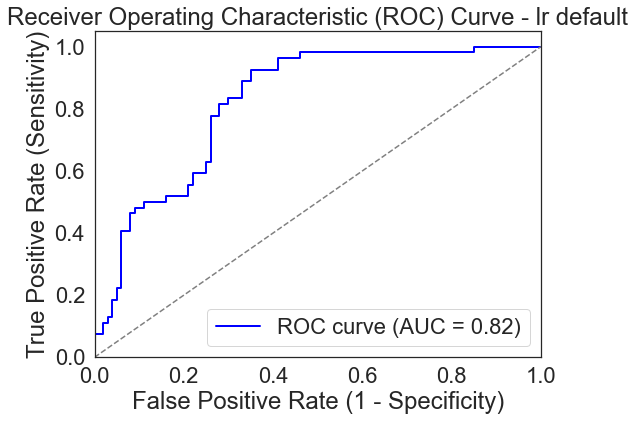

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


lr_probs = lr_fit.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, lr_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - lr default')
plt.legend(loc="lower right")
plt.show()


<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Default)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

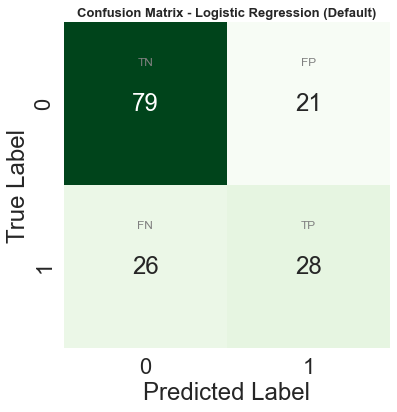

In [53]:
cm = confusion_matrix(y_test, lr_predict)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Logistic Regression (Default)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Logistic Regression - Cross Validation

In [54]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
lr = LogisticRegression()

cross_val_results = pd.DataFrame(cross_validate(lr, X, y, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score', ascending=False)

F-score Precision    Recall  Accuracy
Logistic Regression (CV)                0.728791  0.744016  0.723817  0.765567
Decision Tree (Hyper Parameter Tuning)  0.698922  0.720642  0.695365  0.740858
Logistic Regression (Default)           0.657211  0.571429  0.518519  0.694805
Decision Tree (Default)                   0.6538  0.574468       0.5  0.694805

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (CV)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

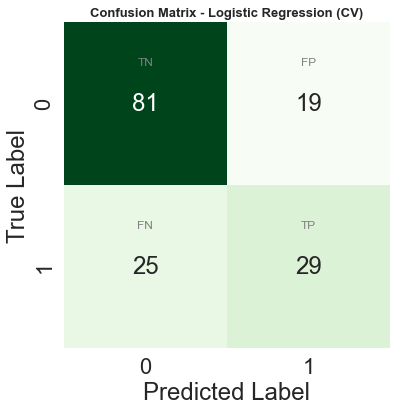

In [55]:
y_pred = cross_val_predict(lr, X_test, y_test, cv=cv)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Logistic Regression (CV)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

LogisticRegression()

<Figure size 1440x4320 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

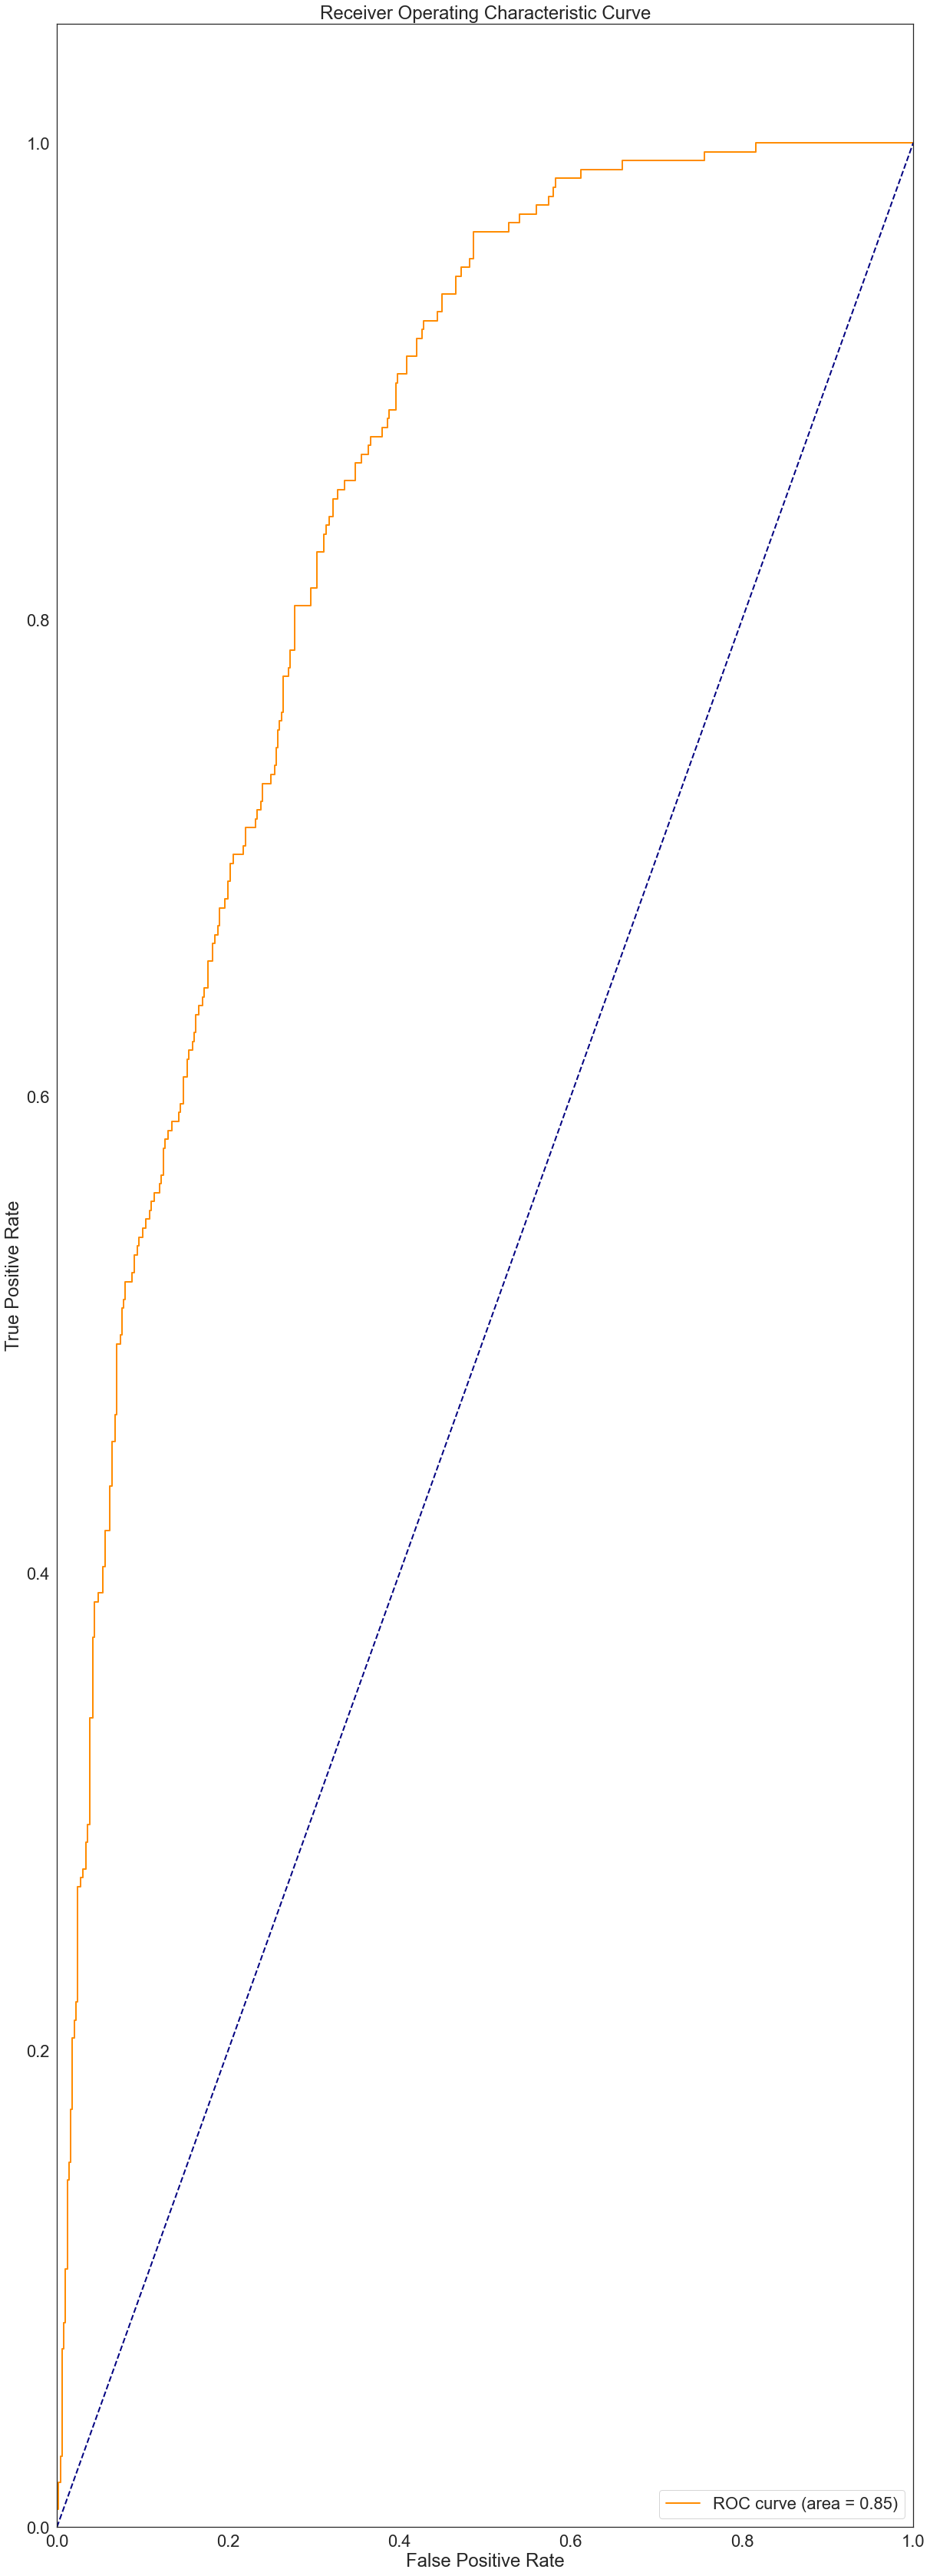

In [56]:

results_df.loc['Logistic Regression (CV)', :] = cross_val_results[['test_f1_macro', 'test_precision_macro', 'test_recall_macro', 'test_accuracy']].mean().values

lr.fit(X, y)

y_prob = lr.predict_proba(X)

fpr, tpr, _ = roc_curve(y, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

###### Cross-validation without hyperparameter tuning is performed to evaluate the generalization performance of a model by splitting the dataset into training and validation subsets multiple times. This process helps to estimate how well the model will perform on unseen data and provides insights into its stability and robustness. By averaging the evaluation metrics across the folds, such as F-score, precision, recall, and accuracy, we obtain a more reliable estimate of the model's performance.

In [57]:
lr = LogisticRegression()
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iteration= [10,20,50,100,200,500, 1000, 2000, 5000]

grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iteration)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

lr_grid = GridSearchCV(estimator=lr, param_grid=grid,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lr_grid_fit = lr_grid.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(lr_grid.best_estimator_, X, y, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score', ascending=False)

F-score Precision    Recall  \
Logistic Regression (CV)                      0.728791  0.744016  0.723817   
Logistic Regression (Hyper Parameter Tuning)  0.728033  0.749218  0.720743   
Decision Tree (Hyper Parameter Tuning)        0.698922  0.720642  0.695365   
Logistic Regression (Default)                 0.657211  0.571429  0.518519   
Decision Tree (Default)                         0.6538  0.574468       0.5   

                                              Accuracy  
Logistic Regression (CV)                      0.765567  
Logistic Regression (Hyper Parameter Tuning)  0.768131  
Decision Tree (Hyper Parameter Tuning)        0.740858  
Logistic Regression (Default)                 0.694805  
Decision Tree (Default)                       0.694805

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Hyper Parameter Tuning)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

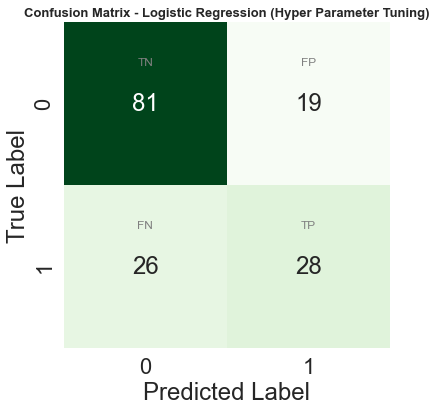

In [58]:

y_pred = lr_grid_fit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Logistic Regression (Hyper Parameter Tuning)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

LogisticRegression(C=0.1, max_iter=10, penalty='l1', solver='saga')

<Figure size 1440x4320 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

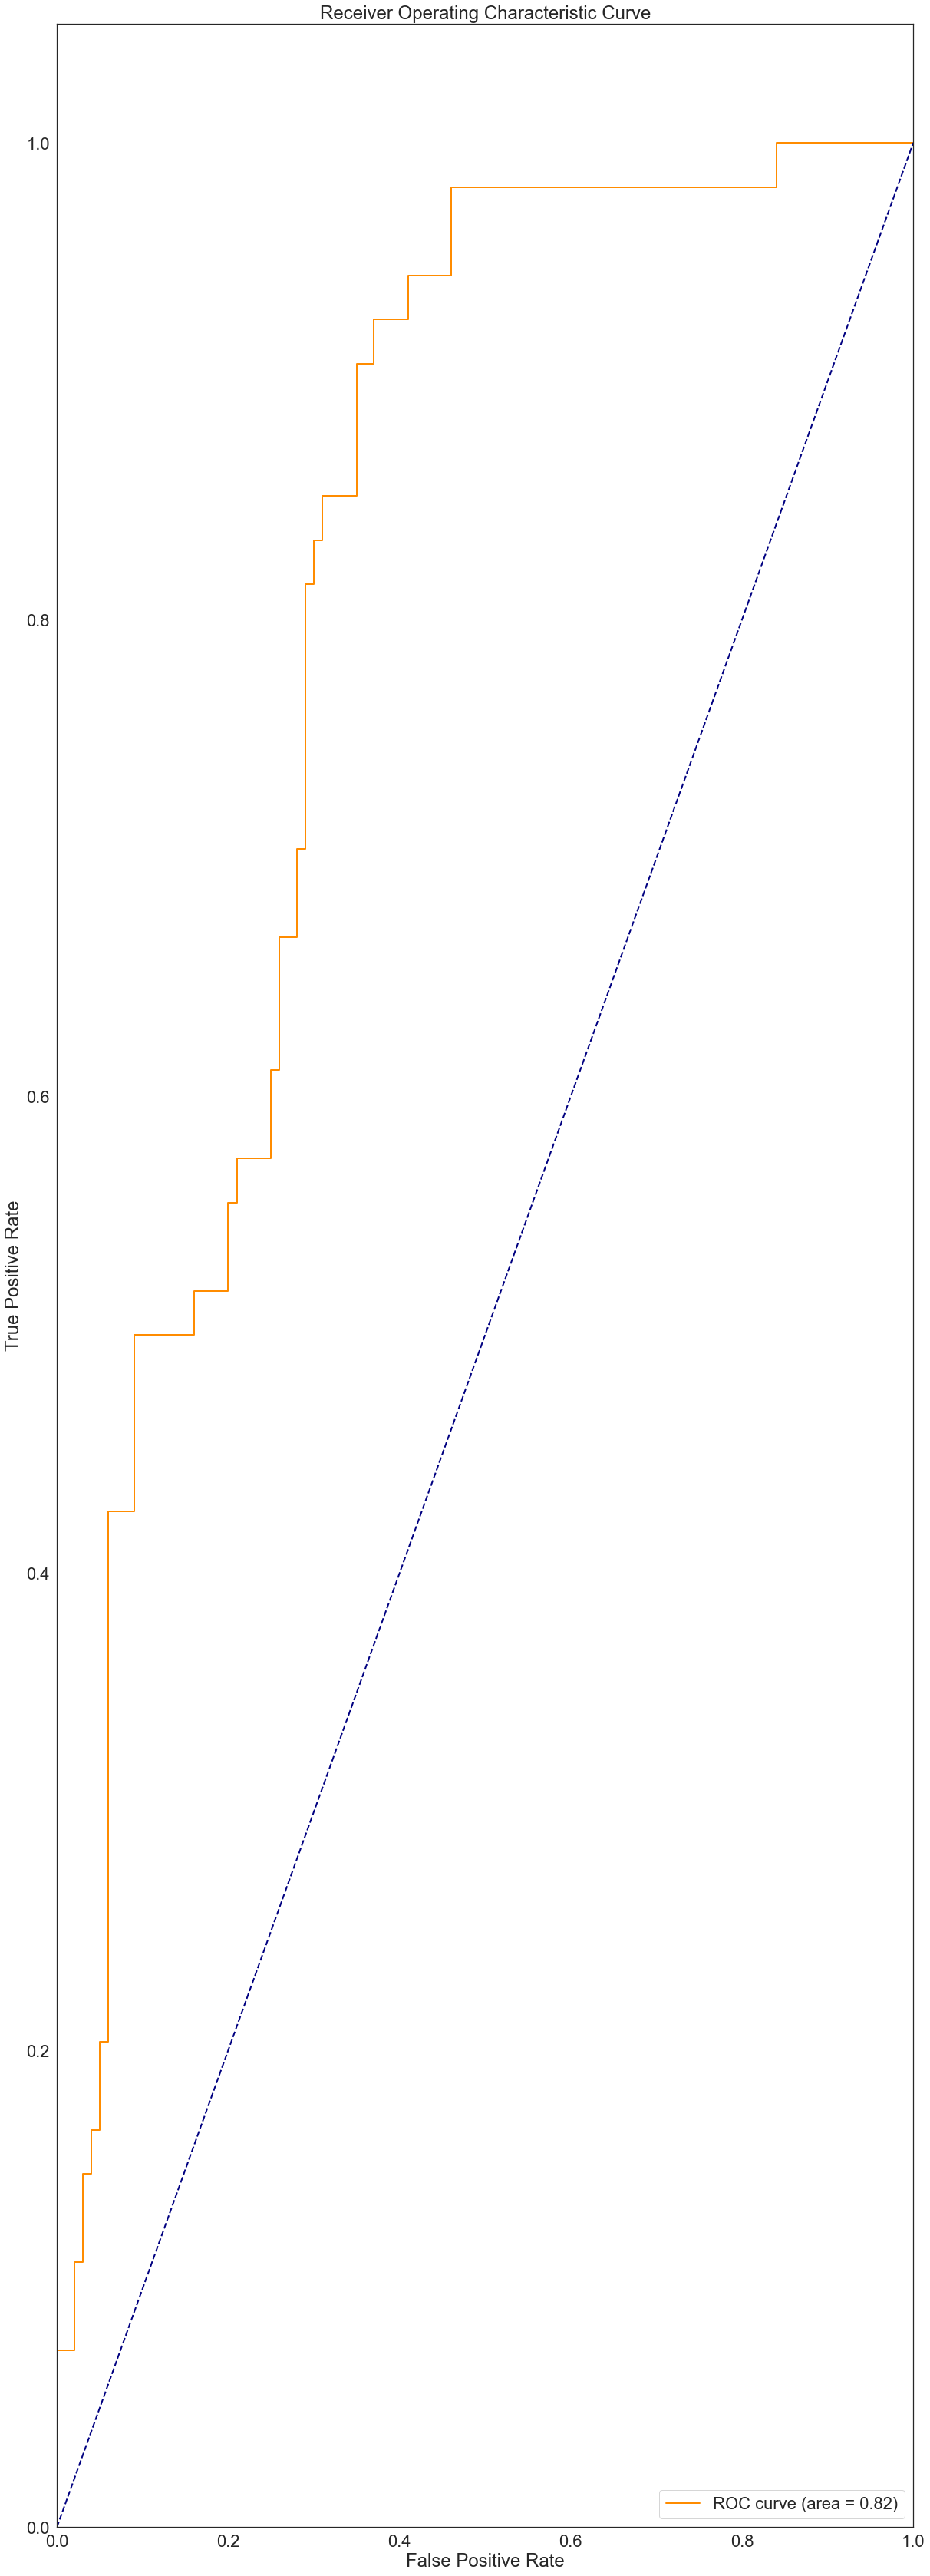

In [59]:

best_lr_model = lr_grid.best_estimator_
best_lr_model.fit(X_train, y_train)

y_prob = best_lr_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()




In [60]:

rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=4)
rf_fit = rf.fit(X_train, y_train)

rf_probabilities = rf_fit.predict_proba(X_test)

positive_class_probabilities = rf_probabilities[:, 1]


threshold = 0.3133784791464973


rf_predict = (positive_class_probabilities > threshold).astype(int)

results_df.loc['Random Forest (Default)',:] = [f1_score(y_test, rf_predict, average='macro'),
                                               precision_score(y_test, rf_predict),
                                               recall_score(y_test, rf_predict),
                                               accuracy_score(y_test, rf_predict)]

results_df.sort_values(by='F-score', ascending=False)


F-score Precision    Recall  \
Logistic Regression (CV)                      0.728791  0.744016  0.723817   
Logistic Regression (Hyper Parameter Tuning)  0.728033  0.749218  0.720743   
Random Forest (Default)                       0.721591  0.576923  0.833333   
Decision Tree (Hyper Parameter Tuning)        0.698922  0.720642  0.695365   
Logistic Regression (Default)                 0.657211  0.571429  0.518519   
Decision Tree (Default)                         0.6538  0.574468       0.5   

                                              Accuracy  
Logistic Regression (CV)                      0.765567  
Logistic Regression (Hyper Parameter Tuning)  0.768131  
Random Forest (Default)                       0.727273  
Decision Tree (Hyper Parameter Tuning)        0.740858  
Logistic Regression (Default)                 0.694805  
Decision Tree (Default)                       0.694805

<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

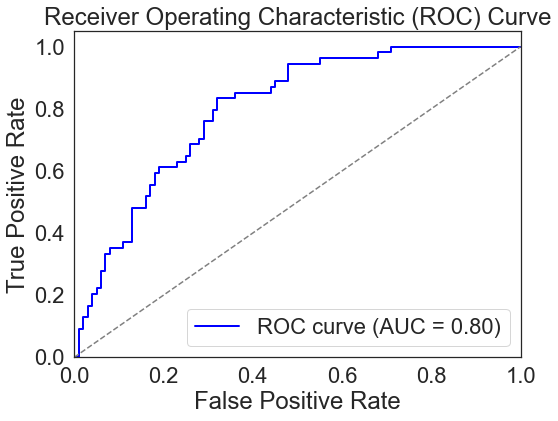

Optimal threshold: 0.31443117884636307


In [61]:

rf_probabilities = rf_fit.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)


<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Default)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

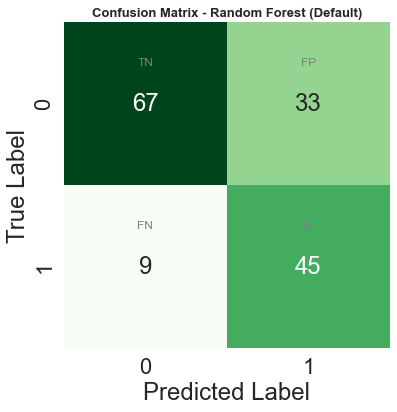

In [62]:
cm = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(8, 6))
# Plot the confusion matrix
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Random Forest (Default)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [63]:
f = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=6)
cross_val_results = cross_validate(f, X, y, cv=5, scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'])

f.fit(X, y)

rf_probabilities = f.predict_proba(X_test)
positive_class_probabilities = rf_probabilities[:, 1]

threshold = 0.42711394444598233

rf_predict = (positive_class_probabilities > threshold).astype(int)


results_df.loc['Random Forest (CV)', :] = [f1_score(y_test, rf_predict, average='macro'),
                                                precision_score(y_test, rf_predict),
                                                recall_score(y_test, rf_predict),
                                                accuracy_score(y_test, rf_predict)]

results_df.sort_values(by='F-score', ascending=False)


RandomForestClassifier(max_depth=6, n_estimators=20, random_state=42)

F-score Precision    Recall  \
Random Forest (CV)                            0.832881      0.75  0.833333   
Logistic Regression (CV)                      0.728791  0.744016  0.723817   
Logistic Regression (Hyper Parameter Tuning)  0.728033  0.749218  0.720743   
Random Forest (Default)                       0.721591  0.576923  0.833333   
Decision Tree (Hyper Parameter Tuning)        0.698922  0.720642  0.695365   
Logistic Regression (Default)                 0.657211  0.571429  0.518519   
Decision Tree (Default)                         0.6538  0.574468       0.5   

                                              Accuracy  
Random Forest (CV)                            0.844156  
Logistic Regression (CV)                      0.765567  
Logistic Regression (Hyper Parameter Tuning)  0.768131  
Random Forest (Default)                       0.727273  
Decision Tree (Hyper Parameter Tuning)        0.740858  
Logistic Regression (Default)                 0.694805  
Decision Tree (Default)                       0.694805

<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

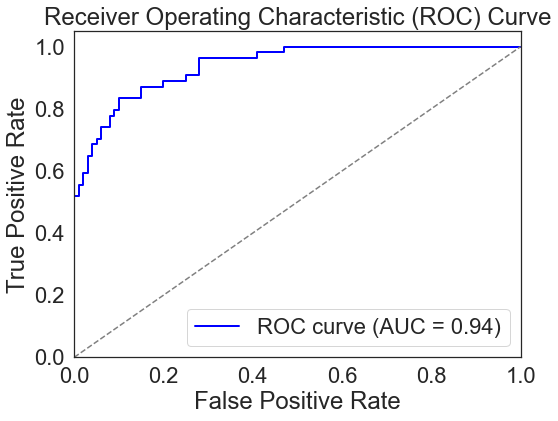

Optimal threshold: 0.4585827385676199


In [64]:
rf_probabilities = f.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)


<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (CV)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

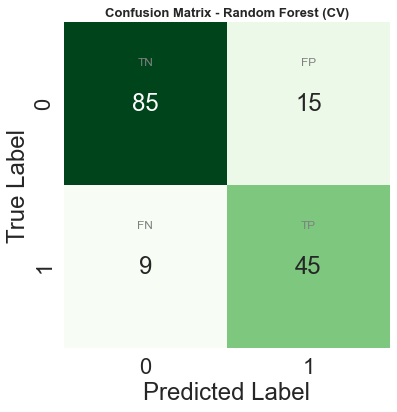

In [65]:
cm = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(8, 6))
# Plot the confusion matrix
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Random Forest (CV)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### RandomizedSearchCV

We'll employ RandomizedSearchCV for hyperparameter tuning combined with cross-validation for our Random Forest (RF) model. Initially, we'll initiate hyperparameter tuning using RandomizedSearchCV, enabling us to explore a broad parameter space efficiently. Subsequently, we'll utilize the insights gained from the randomized search to define a more focused parameter grid for an exhaustive search using GridSearchCV.

In [66]:
rf = RandomForestClassifier()
n_estimators = [3,5,10,20,50,100,300]
max_depth = [1,2,3,4,5,6]
criterion= ['gini', 'entropy']


max_features = [None, 'sqrt', 'log2', 0.25, 0.5, 0.75] 
grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)


cv = KFold(n_splits=10, random_state=42, shuffle=True)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = None)
rf_random_fit = rf_random.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=100; total time=   

In [67]:
rf_random.best_params_

{'n_estimators': 10,
 'max_features': 'log2',
 'max_depth': 4,
 'criterion': 'entropy'}

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=10)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Randomized Parameters)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

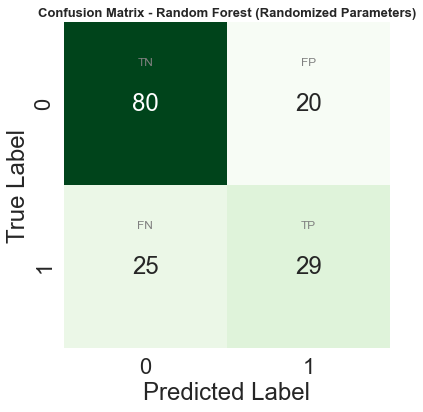

In [68]:
best_rf = rf_random_fit.best_estimator_

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Random Forest (Randomized Parameters)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [69]:
cross_val_results = pd.DataFrame(cross_validate(rf_random.best_estimator_ , X, y, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest (Randomized Parameters)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score', ascending=False)

F-score Precision    Recall  \
Random Forest (CV)                            0.832881      0.75  0.833333   
Logistic Regression (CV)                      0.728791  0.744016  0.723817   
Logistic Regression (Hyper Parameter Tuning)  0.728033  0.749218  0.720743   
Random Forest (Default)                       0.721591  0.576923  0.833333   
Random Forest (Randomized Parameters)         0.712724  0.733435  0.705694   
Decision Tree (Hyper Parameter Tuning)        0.698922  0.720642  0.695365   
Logistic Regression (Default)                 0.657211  0.571429  0.518519   
Decision Tree (Default)                         0.6538  0.574468       0.5   

                                              Accuracy  
Random Forest (CV)                            0.844156  
Logistic Regression (CV)                      0.765567  
Logistic Regression (Hyper Parameter Tuning)  0.768131  
Random Forest (Default)                       0.727273  
Random Forest (Randomized Parameters)         0.755041  
Decision Tree (Hyper Parameter Tuning)        0.740858  
Logistic Regression (Default)                 0.694805  
Decision Tree (Default)                       0.694805

### RF - hyperparameter tuning + cross validation
#### using GridSearchCV

In [70]:

rf = RandomForestClassifier()
n_estimators = [3,5,10,20,50,100,300]
max_depth = [1,2,3,4,5,6]
max_features = [None, 'sqrt', 'log2'] 
criterion = ['gini', 'entropy']

grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

rf_grid = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=None, cv=cv, scoring='accuracy', error_score=0)
rf_grid_fit = rf_grid.fit(X, y)



best_estimator = rf_grid_fit.best_estimator_


best_estimator.fit(X, y)


rf_probabilities = best_estimator.predict_proba(X_test)
positive_class_probabilities = rf_probabilities[:, 1]


threshold = 0.4232566838283717 


rf_predict = (positive_class_probabilities > threshold).astype(int)

f1 = f1_score(y_test, rf_predict, average='macro')
precision = precision_score(y_test, rf_predict)
recall = recall_score(y_test, rf_predict)
accuracy = accuracy_score(y_test, rf_predict)


results_df.loc['Random Forest (Hyper Parameter Tuning)', :] = [f1, precision, recall, accuracy]


RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=10)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Hyper Parameter Tuning)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

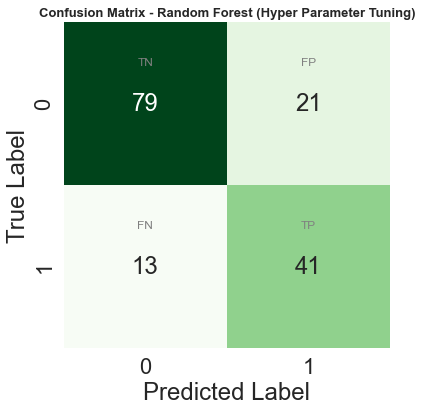

In [71]:
cm = confusion_matrix(y_test, rf_predict)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Random Forest (Hyper Parameter Tuning)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

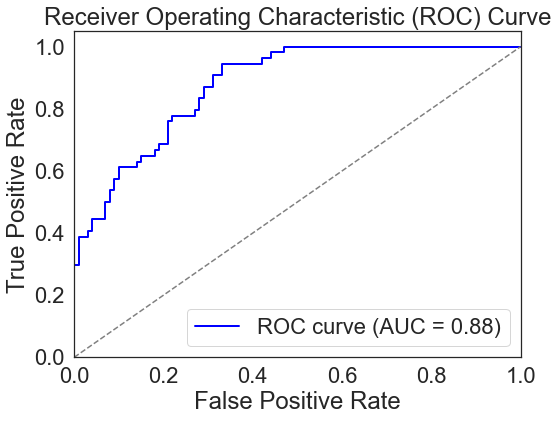

Optimal threshold: 0.2512662517132222


In [72]:

rf_probabilities = rf_grid_fit.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)


In [73]:
results_df.sort_values(by='F-score', ascending=False)

F-score Precision    Recall  \
Random Forest (CV)                            0.832881      0.75  0.833333   
Random Forest (Hyper Parameter Tuning)        0.764907   0.66129  0.759259   
Logistic Regression (CV)                      0.728791  0.744016  0.723817   
Logistic Regression (Hyper Parameter Tuning)  0.728033  0.749218  0.720743   
Random Forest (Default)                       0.721591  0.576923  0.833333   
Random Forest (Randomized Parameters)         0.712724  0.733435  0.705694   
Decision Tree (Hyper Parameter Tuning)        0.698922  0.720642  0.695365   
Logistic Regression (Default)                 0.657211  0.571429  0.518519   
Decision Tree (Default)                         0.6538  0.574468       0.5   

                                              Accuracy  
Random Forest (CV)                            0.844156  
Random Forest (Hyper Parameter Tuning)        0.779221  
Logistic Regression (CV)                      0.765567  
Logistic Regression (Hyper Parameter Tuning)  0.768131  
Random Forest (Default)                       0.727273  
Random Forest (Randomized Parameters)         0.755041  
Decision Tree (Hyper Parameter Tuning)        0.740858  
Logistic Regression (Default)                 0.694805  
Decision Tree (Default)                       0.694805

In [74]:
def diabetes_mean(data):
    zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    diabetes_mean = data[zero_features].mean()
    data[zero_features]=data[zero_features].replace(0, diabetes_mean)
    return data

def apply_transformations(data):
    if data is None:
        print("Data is None at the start of transformations.")
        return None
    print("Applying transformations...")
       # Apply log transformation for highly positively skewed feature
    data['SkinThickness'] = data['SkinThickness'].apply(lambda x: np.log1p(x) if x > 0 else 0)
    # Apply square root transformation for moderately positively skewed features
    data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].apply(lambda x: np.sqrt(x))
    data['Outcome'] = data['Outcome'].apply(lambda x: np.sqrt(x))
    data['BMI'] = data['BMI'].apply(lambda x: np.sqrt(x))
    data['Glucose'] = data['Glucose'].apply(lambda x: np.sqrt(x))
    data['Age'] = data['Age'].apply(lambda x: np.sqrt(x))
    data['Insulin'] = data['Insulin'].apply(lambda x: np.sqrt(x))
    data['BloodPressure'] = data['BloodPressure'].apply(lambda x: np.sqrt(x))

    # Apply reflection and log transformation for negatively skewed feature
    data['Pregnancies'] = data['Pregnancies'].apply(lambda x: np.log1p(-x) if x < 0 else x)
    print("Transformations applied successfully.")
    return data



In [227]:
train = pd.read_csv(r"C:\FINAL_PROF_MACHINE_LEARNING\train", header=0, index_col=0)
train = diabetes_mean(train)
train = apply_transformations(train)


columns_to_keep = [x for x in range(train.shape[1]) if x not in [8]]
X_train = train.iloc[:,columns_to_keep]
y_train = train.iloc[:,8]

Applying transformations...
Transformations applied successfully.


In [228]:
train

Pregnancies    Glucose  BloodPressure  SkinThickness    Insulin  \
353     1.000000   9.486833       7.874008       2.564949   6.557439   
711     5.000000  11.224972       8.831761       3.332205   4.690416   
373     2.000000  10.246951       7.615773       3.713572   9.695360   
46      1.000000  12.083046       7.483315       3.080849   8.869393   
682     3.819218   9.746794       8.000000       3.688879  10.246951   
..           ...        ...            ...            ...        ...   
451     2.000000  11.575837       8.366600       3.080849   8.869393   
113     4.000000   8.717798       7.874008       3.080849   8.869393   
556     1.000000   9.848858       8.366600       3.713572   8.869393   
667    10.000000  10.535654       8.366600       3.332205   8.869393   
107     4.000000  12.000000       7.615773       3.367296  11.832160   

          BMI  DiabetesPedigreeFunction       Age  Outcome  
353  5.215362                  0.761577  4.898979      0.0  
711  5.440588                  0.662571  6.324555      0.0  
373  5.907622                  0.474342  5.000000      0.0  
46   5.449771                  0.750999  5.385165      0.0  
682  6.678323                  0.604979  4.690416      0.0  
..        ...                       ...       ...      ...  
451  5.375872                  0.736206  4.795832      1.0  
113  5.830952                  0.625300  5.000000      0.0  
556  6.172520                  0.466905  5.477226      0.0  
667  5.244044                  0.375500  6.324555      1.0  
107  5.431390                  0.535724  6.082763      0.0  

[614 rows x 9 columns]

In [229]:
y_train

353    0.0
711    0.0
373    0.0
46     0.0
682    0.0
      ... 
451    1.0
113    0.0
556    0.0
667    1.0
107    0.0
Name: Outcome, Length: 614, dtype: float64

In [230]:
test = pd.read_csv(r"C:\FINAL_PROF_MACHINE_LEARNING\final_dataset_test", header=0, index_col=0)


test = diabetes_mean(test)
test = apply_transformations(test)


columns_to_keep = [x for x in range(test.shape[1]) if x not in [8]]
X_test = test.iloc[:,columns_to_keep]
y_test = test.iloc[:,8]

Applying transformations...
Transformations applied successfully.


In [233]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train = y_train.values.ravel()
X_test_scaled = scaler.transform(X_test)
y_test = y_test.values.ravel()

In [234]:
# Fit the model again on scaled data
best_estimator_scaled_fit = best_estimator.fit(X_train_scaled, y_train)

# Predict probabilities on the scaled test data
rf_probabilities_scaled = best_estimator_scaled_fit.predict_proba(X_test_scaled)
positive_class_probabilities_scaled = rf_probabilities_scaled[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, positive_class_probabilities_scaled)

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Make predictions with the optimal threshold
rf_predict_scaled = (positive_class_probabilities_scaled > optimal_threshold).astype(int)

# Calculate performance metrics for the scaled data
f1_scaled = f1_score(y_test, rf_predict_scaled, average='macro')
precision_scaled = precision_score(y_test, rf_predict_scaled)
recall_scaled = recall_score(y_test, rf_predict_scaled)
accuracy_scaled = accuracy_score(y_test, rf_predict_scaled)

# Store the new results in the DataFrame
results_df.loc['Random Forest (scaled)', :] = [f1_scaled, precision_scaled, recall_scaled, accuracy_scaled]

In [235]:
results_df.sort_values(by='Accuracy', ascending=False)

F-score Precision    Recall  \
Random Forest (CV)                            0.832881      0.75  0.833333   
Random Forest (scaled)                        0.801432  0.714286  0.803571   
Random Forest (Hyper Parameter Tuning)        0.764907   0.66129  0.759259   
Logistic Regression (Hyper Parameter Tuning)  0.728033  0.749218  0.720743   
Logistic Regression (CV)                      0.728791  0.744016  0.723817   
Random Forest (Randomized Parameters)         0.712724  0.733435  0.705694   
Decision Tree (Hyper Parameter Tuning)        0.698922  0.720642  0.695365   
Random Forest (Default)                       0.721591  0.576923  0.833333   
Decision Tree (Default)                         0.6538  0.574468       0.5   
Logistic Regression (Default)                 0.657211  0.571429  0.518519   

                                              Accuracy  
Random Forest (CV)                            0.844156  
Random Forest (scaled)                        0.811688  
Random Forest (Hyper Parameter Tuning)        0.779221  
Logistic Regression (Hyper Parameter Tuning)  0.768131  
Logistic Regression (CV)                      0.765567  
Random Forest (Randomized Parameters)         0.755041  
Decision Tree (Hyper Parameter Tuning)        0.740858  
Random Forest (Default)                       0.727273  
Decision Tree (Default)                       0.694805  
Logistic Regression (Default)                 0.694805

<Figure size 576x432 with 0 Axes>

Text(0.5, 0.25, 'TN')

Text(1.5, 0.25, 'FP')

Text(0.5, 1.25, 'FN')

Text(1.5, 1.25, 'TP')

Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Hyper Parameter Tuning)')

Text(0.5, 20.5, 'Predicted Label')

Text(98.62, 0.5, 'True Label')

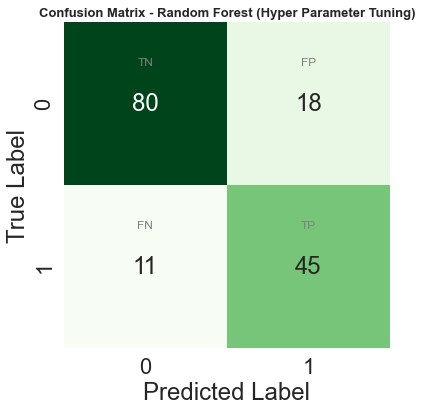

In [236]:
# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predict_scaled)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
heatmap.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=12, color='grey')
heatmap.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=12, color='grey')
plt.title('Confusion Matrix - Random Forest (Hyper Parameter Tuning)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [239]:
results_df.iloc[[6,9]]

F-score Precision    Recall  Accuracy
Random Forest (CV)      0.832881      0.75  0.833333  0.844156
Random Forest (scaled)  0.801432  0.714286  0.803571  0.811688

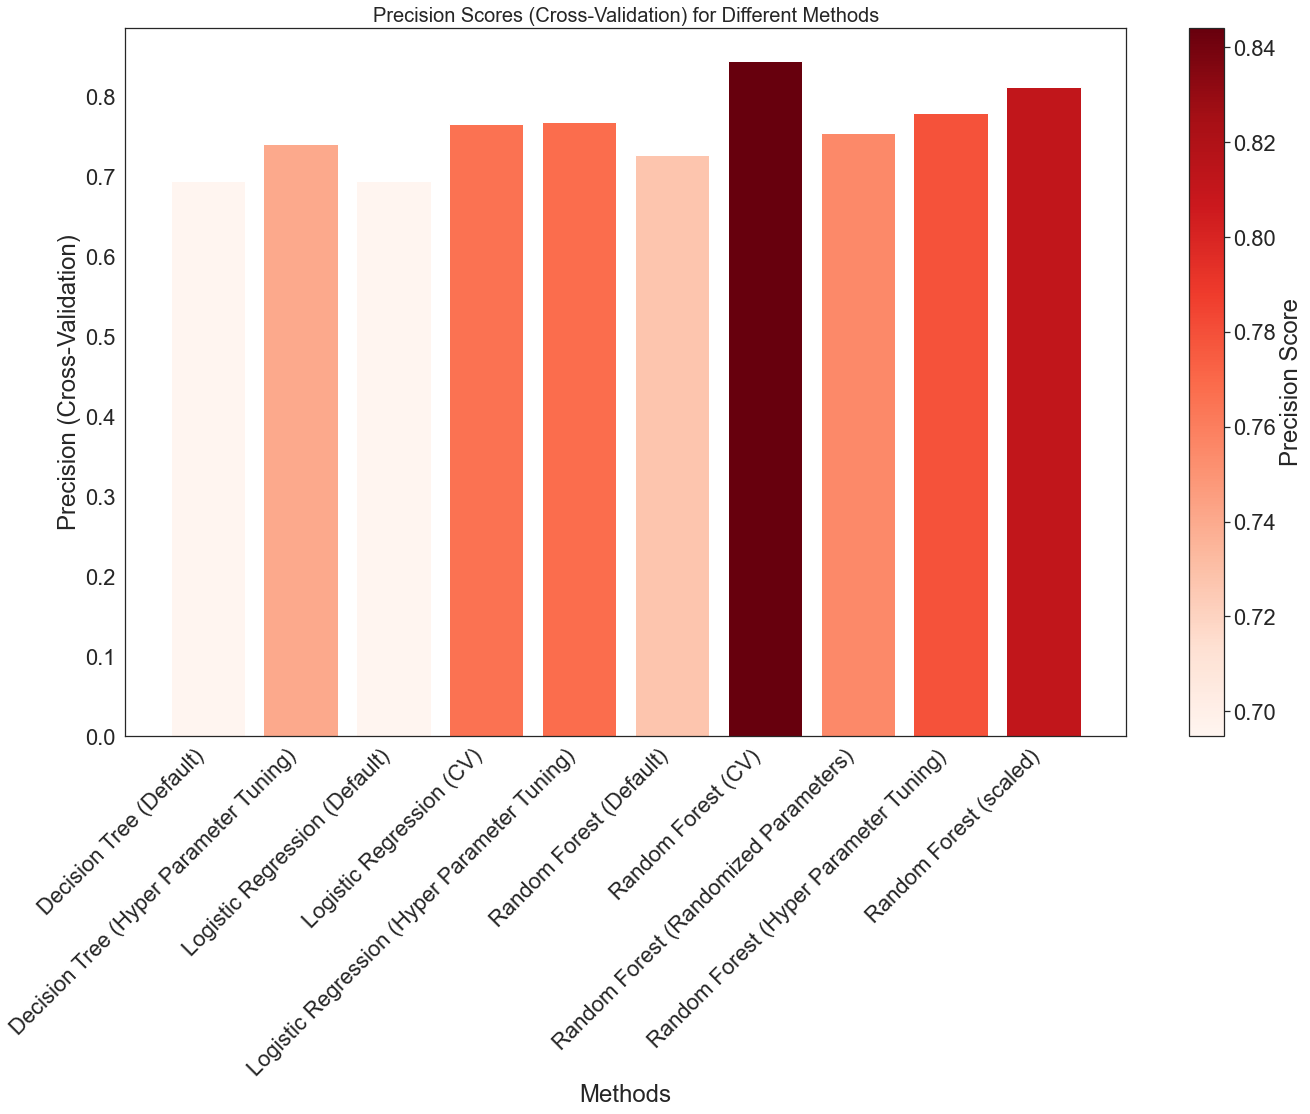

In [241]:
methods = results_df.index.tolist()
precision_cv = results_df['Accuracy'].tolist()

norm = plt.Normalize(min(precision_cv), max(precision_cv))
colors = plt.cm.Reds(norm(precision_cv))

fig, ax = plt.subplots(figsize=(20, 16))
bars = ax.bar(methods, precision_cv, color=colors)
ax.set_xlabel('Methods')
ax.set_ylabel('Precision (Cross-Validation)')
ax.set_title('Precision Scores (Cross-Validation) for Different Methods',  fontsize=20)
plt.xticks(rotation=45, ha='right')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Precision Score')

plt.tight_layout()
plt.show();